#  9. Solidity

* Last Updated 20190515WEB1000 20190120SUN0000 20180707SAT1300 20170112

## 9.1 학습내용

### 9.1.1 목표
 
* solidity 배우기

### 9.1.2 목차

* 9.2 [Solidity File](#9.2)
    * Pragma
    * Import
    * Contract
    * comments
* 9.3 컨트랙의 구조
* 9.4 데이터 타잎
    * Value Type, Reference Type
    * 9.4.1 [계정주소](#9.4.1)
    * 9.4.2 [저장장소](#9.4.2)
    * 9.4.3 [가시성](#9.4.3)
    * 9.4.4 [conversion](#9.4.4)
    * 9.4.5 [전역 변수](#9.4.5)
    * 실습 DataTypeTest
    * 실습 SendTest transfer
* 9.5 [함수](#9.5)
    * 9.5.1 constant
    * 9.5.2 modifier
    * 실습 BankV2
    * 9.5.3 [fallback](#S.3.4)
    * 9.5.4 [Events and logs](#S.3.5)
    * 실습 testEvent
    * 실습 e_testDeposit
    * 실습 e_testEvent
    * 문제 Hello World Contract - 이름정하고, 헬로우 할 때 알아내기
    * 문제 multiply7
    * 문제 단순한 저장소
* 9.6 [제어](#9.6)
* 9.7 데이터구조
    * 9.7.1 Array
    * 9.7.2 [mapping](#S.5.2)
    * 실습 Members
    * 실습 Coin
* 9.8 [Exception](#9.6)
* 9.9 [interactions](#9.7)
    * 9.9.1 [컨트랙 결합](#9.9.2)
    * 9.9.2 import
    * 실습 C1C2
    * 실습 Car Engine
    * 실습 Observer
    * 실습 StingUtils myLib LibraryEx
    * 실습 Area Square
* 9.10 [상속](#9.10)
    * 실습 mortal greeter
* 9.11 [Library](#9.11)
    * 9.11.1 library internal
    * 9.11.2 library public
* 9.12 [보안](#9.12)


## 9.2 Solidity File
<a id='S.1'></a>

Solidity File은 contract 소스코드를 확장자 ```.sol```로 저장한 파일이다.
파일에는 버전 pragma, 다른 소스코드를 불러오는 import문, 도움말 comments를 포함할 수 있다.

### Pragma
```pragma```는 컴파일러 버전을 선택할 때 사용한다.
반드시 적어주지 않아도 되지만 프로그램의 첫 줄에 적는다.

```python
pragma solidity <버전>;
```

### Import
import는 filename의 프로그램을 읽어들여 사용하게 된다.

```python
import "filename"
```
그 파일 내 **컨트랙, 전역변수** 등을 그대로 가져오기 때문에 주의를 해야 한다.
이로 인해 현재 파일의 전역변수와 문제를 일으킬 수 있으므로
```import ... as ...``` 구문을 사용하기도 한다.

```python
import "filename" as symbolName
```

### Contract

Contract은 비유를 하면, 객체지향 클래스에 해당한다. 곧 상세하게 설명하게 된다.
Contract은 블록체인 상의 프로그램이지만, 그 개념이나 구현하는 객체지향언어에서 사용하는 **클래스와 유사**하다.
프로그램 단위로서 Contract으로서 필요한 기능을 제공하는다.
따라서 클래스와 같이, Contract은 생성자, 속성, 함수로 구성한다.
물론 객체지향의 상속, 다형성을 사용할 수 있다.
따라서 프로그래밍은 Contract을 만들어 나가면서 이루어지게 된다.
CapsWord 스타일로 단어의 첫글자는 대문자로 적어준다




### Comments
<a id='S.1.4'></a>

도움말을 적는다. C 또는 자바 언어 스타일과 동일하다.
한 줄은 ```//```라고 맨 앞에 적어주어 도움말로 만든다.
여러 줄은 해당 블록 앞 뒤에 ```/*...*/```를 적어준다.
Doxygen 스타일의 @태그를 사용하는 것도 가능하다.
```
/**
@param p1 The first parameter
@param p2 The second parameter
@returns the returned results
*/
```

## 9.3 컨트랙의 구조

컨트랙은 객체지향의 클래스와 같이 구성하면 된다.
클래스가 (1) 멤버 속성과 (2) 멤버 함수로 구성하듯이 컨트랙도 마찬가지이다.
또한 라이브러리를 가져오는 방식도 유사하다.
객체지향으로서 상속을 사용할 수 있다는 점도 당연하다.
컨트랙은 다음 요소로 구성될 수 있다.
* 컨트랙의 멤버 속성으로 **state variables**
* 함수 function
* 함수 modifiers
* Events
* 또는 라이브러리 또는 다른 컨트랙을 상속


## 9.4 데이터 타잎
<a id='9.3'></a>

Solidity는 다른 언어에서 지원하는 데이터타잎을 큰 차이 없이 사용할 수 있지만, 몇 가지 주의할 점이 있다.
블럭체인은 그 특성상 저장공간을 많이 사용할수록 비용이 발생하기 때문에 **저장공간을 효율적**으로 사용해야 한다.
그리고 소수점은 아직 지원되지 않아 float, double과 같은 자료형이 없다.

데이터 타잎은 (1) value type, (2) reference type으로 크게 구분할 수 있다.
* **Value Type**:
데이터 그 자체의 **값**으로 저장되고, 전달되는 타잎이다. 다른 변수에 할당되거나 함수인자로 전달될 경우, 값이 복사가 되어 전달되는 타잎이다.
```bool```, ```int/uint```, ```address```, ```bytes (1~32 바이트)```, ```enum```이 해당된다.
value type은 **32바이트**로 그 값을 저장할 수 있다.

* **참조 타잎 Reference Type**: **32바이트를 넘는 크기의 데이터**는 그 저장주소를 저장한다. 그 저장주소가 복사되어 전달되기 때문에 원본 데이터가 변경되면 따라서 변경된다. ```bytes```, ```Array```, ```String```, ```Struct```, ```mapping```이 해당된다.

데이터타잎 | 설명
----------|----------
bool | uint8, 0 and 1의 값을 가진다
uint<M> | unsigned integer, M은 8비트 단위로 256바이트까지 가능하다 0 < M <= 256, M % 8 == 0
int<M> | signed integer, M은 8비트 단위로 256비트까지 가능하다 0 < M <= 256, M % 8 == 0
address | 주소. 크기가 20바이트이므로 uint160 이다.
uint, int | uint256, int256
bytes<M> | 바이너리 타잎, M은 32바이트까지 가능하다 0 < M <= 32. **```bytes``` (크기가 없는)는 value type이 아니다**.
function | bytes24, 주소 + function selector
string | UTF-8 문자열, **value type이 아니다**.

#### boolean
Boolean은 true, false 둘 중의 하나 값을 가지는 데이터타잎이다.
비교연산자 (==, !=, !, >, <), 논리연산자 (&& ||)의 결과가 true, false 와 같이 boolean이 된다.

```python
bool isMarried=true;
```

#### int
```int```는 정수를 가지는 타잎이고 ```signed```, ```unsigned```로 구분할 수 있다.
* ```signed int```는 양수, 음수 모두 허용되며
* ```unsigned int```는 양수만 사용할 수 있다.

그 크기는 8, 16, 24, 32 이런 식으로 8바이트 단위로 증가하고 **최대 32**바이트까지 사용할 수 있다.
크기를 적지 않으면 256비트로 간주한다.
```+, -, *, /, %, **, ++, --, +=, -=```와 같은 산술연산자를 사용할 수 있다.

```python
int256 x=1;
```


#### enumeration

enum은 요소로 구성된 데이터 타잎을 정의할 경우 사용한다.
예를 들면, 요일과 같이 월, 화, 수, 목, 금, 토를 '집합'을 구성할 경우 enum을 사용한다. 
요소는 0부터 시작하여 정수 값을 가진다.
**비교**에 사용하며, 존재하지 않는 선택으로 인한 오류를 막을 수 있어 유용하다.
아래는 성별을 남, 녀로 구성한 enum이다.
**enum이름.변수명**으로 사용한다.

```python
enum gender {male, female}
enum Day {SUNDAY, MONDAY, TUESDAY, WEDNESDAY, THURSDAY, FRIDAY, SATURDAY}
```

#### 고정크기 byte array

```bytes```는 ```bytes1``` ~ ```bytes32``` 사이의 어떤 크기로 선언할 수 있다.
그러니까 **최대 32바이트까지 1바이트 단위**로 크기를 늘릴 수 있다.
byte, bytes32는 hex 값 뿐만 아니라 정수, 문자, 문자열을 가질 수 있다.
```byte```는 1 바이트, 8비트의 길이를 가진다. 따라서 ```byte```는 ```bytes1```과 동일하다. 

```python
bytes1 x= 0xFF;
bytes23 place1 = "7 hongji-dong jongro-gu";
bytes8 place2 = "7 hongji";
```

#### 변동크기 byte array

```bytes``` (바이크 크기를 의미하는 숫자가 없는) 또는 ```string```은 그 크기가 정해져 있지 않아서 가변적이다.
길이 제한이 없는 경우 사용한다.
string은 UTF8 형식으로 문자열을 저장한다.

크기를 알려주는 bytes(s).length and bytes(s)[2]를 사용할 수 있다.

```python
string n = "hello";
```

#### struct

struct은 서로 관련있는 데이터를 그에 맞는 데이터타잎으로 구성하여 묶어서 사용할 수 있다. CapWords 스타일로 첫글자는 대문자로 적어준다.

```python
struct Student {
        uint num;
        string name;
        bool isEnrolled; 
}
student s1=Student(201911111,"jslim",true); 
```

* constant 상수
```python
string constant name="jsl";
```

다음 명령문 ```^0.5.0```은 메이저버전 5, 마이너버전 0을 의미한다.
맨 앞 ```^``` caret는 메이저버전으로 시작하는 최신버전을 선택한다는 의미이다.
따라서 현재 발표된 최신 버전이 0.5.3이므로, 이를 선택하게 된다.

줄 | 설명
-----|-----
1 | 컴파일러 0.5의 최신 버전으로 설정
6 | ```bytes1```은 ```byte```과 동일한 의미
7 | ```bytes23```에는 23글자를 입력. 한 글자를 추가하면 오류가 발생된다.
8 | ```bytes8```에는 8글자를 입력.
18 | ```bytes1```로 선언된 b1을 ```byte```로 반환한다. ```byte```와 ```bytes1```은 동일한 의미.
25 | ```assert()```가 오류이면 ```Exception```이 발생하고, 다음 줄이 실행이 되지 않는다. 즉 ```x==1```인 경우 ```true```가 반환된다.
28~30 | ```struct```은 반환할 수 없다. 항목 하나 하나를 반납한다.
38 | bytes.length는 가능하다.
43 | <string>.length는 오류.

In [1]:
%%writefile src/DataTypeTest.sol
pragma solidity ^0.5.0;
contract DataTypeTest {
    bool isMarried=true;
    int256 x=2;
    bytes1 b1=0xFF;
    bytes23 place23="7 hongji-dong jongro-gu";
    bytes8 place8="7 hongji";
    bytes place="7 hongji-dong jongro-gu Seoul";
    string constant name="jsl";
    struct Student {
            uint num;
            string name;
            bool isEnrolled; 
    }
    Student s1=Student(201911111,"jslim",true);
    enum gender {male, female}
    function getB1() public view returns(byte) {
        return b1;
    }
    function getB23() public view returns(bytes23) {
        return place23;
    }
    function testInt() public view returns(bool) {
        assert(x==1);
        return true;
    }
    function getStudent() public view returns(uint, string memory, bool){
        return (s1.num, s1.name, s1.isEnrolled);
    }
    function getStudentName() public returns(string memory){
        Student memory s2=Student(201911111,"jslim",true);
        return s2.name;
    }
    function testBytes() public returns(uint) {
        bytes memory b="7 hongji-dong jongro-gu";
        //return place23.length;  //ok
        return b.length;        // returns 23
    }
    function testString() public returns(uint) {
        string memory nameLocal="jslLocal";  //should be memory
        //return nameLocal.length;  //error
        return bytes(nameLocal).length;  //casting
    }
    function testArr() public returns(uint) {
        uint[3] memory intArr;      // should be memory
        return intArr.length;
    }
}

Overwriting src/DataTypeTest.sol


### 9.4.1 address

address는 계정의 주소로서 20 바이트 길이를 가진다.
우리가 은행의 계좌번호를 통해 잔고를 조회하거나, 입출금을 할 수 있다.
address도 마찬가지이다.

멤버 | 설명
-----|-----
```<address>.balance (uint256)``` | 계정의 wei 잔액. 자신이 아니더라도 누구나 읽을 수 있다.
```<address>.send(uint256 amount) returns (bool)``` | 계정에서 송금 기능. 실패하면 false 반환.
```<address>.transfer()``` | 계정에서 송금 기능. 실패하면 throw 예외 발생. 따라서 send() 보다 안전
```<address>.call.value().gas()``` | 계정에서 송금기능. 실패하면 false 반환. call() 함수는 low-level 하위수gas를 처리하는 경우

다음과 같이 잔고를 조회할 수 있다.
```python
address.balance
```

또한 송금을 할 수 있다.
은행거래에서도 타인의 계좌에서 임의로 인출이 허용되지 않는 것처럼
송금은 자신의 주소에서만 가능하다.
자신의 주소는 스스로 unlock, sign을 할 수 있는 권한이 있고, 그에 따라 출금이 가능한 것이 당연한다.
그러나 임의의 주소에서 누군가 출금을 한다는 것은 비상식적이다.
금액의 단위는 Wei이다.

0.5.0 버전부터 주소에서 transfer() 함수를 사용하여 송금하려면 
address payable로 선언해야 한다.

```python
address payable owner;
```

#### send()
send() 함수는 계정으로 송금을 하고, 그 결과를 **성공 또는 실패를 나타내는 boolean으로 반환**한다.
문제는 송금이 실패했을 경우에 발생한다.
송금이 성공적으로 이루어지 않았다면, ```call statck error``` 또는 ```out of gas error``` 등의 이유로 실패하는 경우에도 예외 **Exception이 발생하지 않아** 문제가 될 수 있다.
송금이 실패한 경우에도 **금액이 반환되지 않아서** 주의해야 하며, 금액을 반환하거나 적절한 처리 로직을 넣어 주어야 한다.
```!send()```라고 실패를 거르는 프로그래밍을 하는 것이 필요하다.

```python
address _receiver = 0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480;
if(myAddress.balance>=10) _receiver.send(10);
```

#### transfer()
실패하면 throw 예외를 발생시키며, 호출자에게 환급된다. 따라서 send() 보다 안전하다.

```
address.transfer(amount)
```

#### call (두 계약 사이에 call하는 경우는 다음에 설명)
* call, callcode, delegatecall은 low-level이므로 가급적 사용하지 않는다.
call함수는 gas를 정해서 처리하는 경우
```
address.call.value(20) 누구에게>??? 20 Wei를 송금한다.
```

**받는 측 함수를 실행하면서 송금**.
함수를 호출, gas는 2, 송금액은 20 Wei. 이 경우 gas금액이 적어서 실패하게 될 것이다.
```
f.gas(2).value(20)()
```

* this는 contract 자신의 주소를 말한다.

```python
this.balance
this.myFunction()
````

### 9.4.2 저장장소
<a id='S.2.3'></a>

reference type은  ```Arrays```, ```struct```, ```mapping```과 같이 32바이트 이상의 크기를 가진 복잡한 데이터 타잎이다.
이들 변수는 저장장소를 정의해 줄 수 있다.

* ```storage```는 32바이트 길이의 key-value 형식의 저장되면 계속 유지되는 경우이다. 컨트랙의 모든 함수에서 값을 볼 수 있다. 컨트랙의 상태변수는 기본 값이 ```storage```이며 일단 저장이 되면 영원히 저장된다.
* ```memory```는 함수의 지역변수. 함수 내에서만 짧은 시간 동안 사용되므로 memory 수식어를 붙여준다. 임시로 저장되는 경우에 사용한다. 지역변수와 같이 함수 내에서 국한되어 저장된다. **함수의 인자 또는 반환 값은 memory를 사용한다. 단 struct, array or mapping와 같은 reference type은 지역변수라 하더라도 storage가 기본 값이다.
* ```stack```: 지역변수 (array, struct, mapping 제외)를 저장하는 stack. 1,024 수준까지 저장할 수 있고 그 이상은 예외처리 된다. 비용은 memory와 동일하다.
* ```calldata```: **외부**에서 함수를 호출할 때 호출자가 제공하는 데이터를 저장한다.

요약하면,
* 상태변수는 storage에 저장한다.
* 지역변수 (함수인자/반환, value type 지역변수)는 memory를 기본 default로 사용한다.
단, 함수에서 사용되는 reference type (struct, array, mapping, string)은 기본이 storage이고, memory를 사용하려면 선언이 필요하다.

### 9.4.3 가시성

state variables는 가시성을 적어준다.
모든 state variables는 기본 값이 internal로 정의한다.
컨트랙 내부에서만 사용할 수 있고, 상속을 하면 자식이 물려받을 수 있다.
외부에서 사용하려면 ```public```으로 선언하면 된다.

구분 | 설명 | default
-----|-----|-----
public | 객체지향 public과 동일. 블럭체인 외부에서 누구나 사용할 수 있다. | no
private | 블록체인 내부에서는 객체지향 private과 동일. | no
internal | 현재 컨트랙 내부에서만 또는 상속의 경우에 사용하는 경우. java의 protected와 같은?? | yes
external | internal의 반대, 외부에서 호출. 내부에서 사용할 경우 this.f()로 호출함. | no



## 실습: 주소 계정에서 입출금

앞서 geth 단말에서 account[0]에서 account[1]로 전송해보았다.
컨트랙에서 송금하는 프로그램을 개발해 보자.
은행을 경유하지 않고도 송금이 이루어지는 과정을 이해해 보자.
은행없이 송금하는 경우, 서로 어떻게 신뢰할 수 있는지
실패하는 경우에는 어떻게 복구할 수 있는지 생각해 보자.


### 단계 1: 컨트랙 개발

줄 | 설명
-----|-----
5 ~ 8 | 전송자의 msg.value에 입력된 ether를 contract으로 입금하는 함수이다. 주의할 점은 함수인자 amount는 ether가 아니다. 실제 입금되는 금액은 msg.value이다. 단 msg.value와 amount가 동일해야 입금이 실행된다.
9 ~ 11 | msg.sender 계정으로 컨트랙 자신의 잔고, address(this).balance를 전부 이체한다. msg.sender는 매번 메시지를 전송할 때마다 변경되는 것이 아니라, 배포하는 시점의 전송자 즉 프로그램을 배포하는 권한을 가진 사람만이 (정확히 말하면 개인키) owner가 된다.
12 ~ 14 | 컨트랙 자신의 잔고, address(this).balance를 조회한다.

In [5]:
%%writefile src/myBank.sol
pragma solidity ^0.5.0;

contract myBank {
    function deposit(uint256 amount) payable public {
        //'value' of transacion object
        require(msg.value == amount);
    }
    function withdraw() public {
        msg.sender.transfer(address(this).balance);
    }
    function queryBalance() public view returns (uint256) {
        return address(this).balance;
    }
}

Overwriting src/myBank.sol


### 단계 2: 컴파일

In [6]:
!solc --gas --abi --bin src/myBank.sol


======= src/myBank.sol:myBank =======
Gas estimation:
construction:
   129 + 77200 = 77329
external:
   deposit(uint256):	259
   queryBalance():	601
   withdraw():	infinite
Binary: 
608060405234801561001057600080fd5b50610182806100206000396000f3fe608060405260043610610051576000357c01000000000000000000000000000000000000000000000000000000009004806336f40c61146100565780633ccfd60b14610081578063b6b55f2514610098575b600080fd5b34801561006257600080fd5b5061006b6100c6565b6040518082815260200191505060405180910390f35b34801561008d57600080fd5b506100966100e5565b005b6100c4600480360360208110156100ae57600080fd5b8101908080359060200190929190505050610145565b005b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b3373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f19350505050158015610142573d6000803e3d6000fd5b50565b803414151561015357600080fd5b5056fea165627a7a723058200be23183b595a23b19c1edd28a441bd6edb3c079b72867b70

### 단계 3: 컨트랙 배포

In [8]:
%%writefile src/myBankDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"}];
var _bin="608060405234801561001057600080fd5b50610182806100206000396000f3fe608060405260043610610051576000357c01000000000000000000000000000000000000000000000000000000009004806336f40c61146100565780633ccfd60b14610081578063b6b55f2514610098575b600080fd5b34801561006257600080fd5b5061006b6100c6565b6040518082815260200191505060405180910390f35b34801561008d57600080fd5b506100966100e5565b005b6100c4600480360360208110156100ae57600080fd5b8101908080359060200190929190505050610145565b005b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b3373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f19350505050158015610142573d6000803e3d6000fd5b50565b803414151561015357600080fd5b5056fea165627a7a723058200be23183b595a23b19c1edd28a441bd6edb3c079b72867b70c48245fbfc5bddb0029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new("hello world",{data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Writing src/myBankDeploy.js


In [9]:
!node src/myBankDeploy.js

contractAddress:  undefined
transactionHash:  0x169bdad38e4fd3535661a206d1fd8853709daef844ac5e7f9bbdb5e5f289bc0b
contractAddress:  0x646570db59e036e51a881f5e46722216ccbe7f52
transactionHash:  0x169bdad38e4fd3535661a206d1fd8853709daef844ac5e7f9bbdb5e5f289bc0b


### 단계 4: 사용

value를 넣으면 msg.value로 전달이 된다.
따라서 인자도 동일하게 1111 Wei을 넣어준다.
마이닝을 하고나면 잔고가 1111이 된다.
명시적으로 잔고에 합산을 하지 않아도 된다.

자신의 잔고에서 1111만큼 빠져나간 것을 확인해보자.
```python
> eth.getBalance(eth.accounts[0]);
94999999999999998889
```

In [9]:
%%writefile src/myBankUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"}];
var _contract = web3.eth.contract(_abiArray);
var myBank = _contract.at("0x646570db59e036e51a881f5e46722216ccbe7f52");
console.log(web3.eth.getBalance(web3.eth.accounts[0]).toNumber());
console.log(myBank.deposit(1111,{from:web3.eth.accounts[0],gas:80000,value:1111}));
var bal=myBank.queryBalance.call();
console.log(bal.toString());
console.log(web3.eth.getBalance(web3.eth.accounts[0]).toNumber());
myBank.withdraw.sendTransaction({from:web3.eth.accounts[0]});

Overwriting src/myBankUse.js


In [10]:
!node src/myBankUse.js

755000000000000000000
0x423d8029c8b70009da4001184ba989475225ba2d8d8cdb5cb9a7b5e5ece207cf
4444
755000000000000000000


1111을 deposit() 입금하면 잔고에 반영이 되는 것을 볼 수 있다.
또한 withdraw() 출금하면 잔고가 0이 되면서 전송자의 잔고가 증가한다.

In [11]:
!node src/myBankUse.js

760000000000000000000
0x4026b7152afdffc69b56c5799e7bce73ce886687a7f0a4e313018c84a772a1d3
0
760000000000000000000


### 9.4.4 conversion

형변환을 할 때는, 예를 들어 int8에서 uint로 변환할 경우 괄호 안에 써주면 된다.
```
int8 y=-1;
uint x=uint(y);
```

```0xDCBA4321```은 16진수, 8자리이다.
한 자리에는 0,1,2...D,E,F까지 $2^4$ 가지를 표현할 수 있고, 4비트가 소요된다.
따라서 8자리 ```0xDCBA4321```를 저장하려면 4바이트씩 32비트가 필요하다 (8자리 x 4비트).
그래서 uint32로 선언했다.
이 데이터 uint32를 uint16으로 변환해보자.
16비트로 형변환하면 4자리 정수가 되고 **오버플로우는 위 4자리부터 잘려 나가게 된다**.
따라서 y에는 ```0x4321```이 저장된다.

```java
uint32 x = 0xDCBA4321;
uint16 y = uint16(x);
```

```string```을 ```bytes```로 변환하는 경우:

```
string s = "seoul";
bytes b = bytes(s);
```


### 9.4.5 전역 변수
<a id='S.2.5'></a>

* Ether
```
1 ether == 1000 finney
```

* time
```
1 == 1 seconds, 1 years=365 days
```

* now | 현재 시간, block.timestamp와 동일


* tx
    * tx.origin 트랜잭션 전송자 주소
    * receiver
    * signiture (sender를 인식하기 위한) 
    * amount
    tx.gasprice

* block
    * block.coinbase | 현재 블록 마이너의 주소
    * block.difficulty | 현재 블록의 난이도
    * block.gaslimit | 현재 블록의 gaslimit
    * block.number | 현재 블록 수
    * block.blockhash | 현재 블록 해쉬 값
    * block.timestamp | 현재 블록 타임스탬프 epoch (1970년 1월 1일 0시) 이후 지나간 초, uint256.

* msg
    * msg.data | call 데이터 (bytes 값으로 표현)
    * msg.gas | gas 잔여분
    * msg.sender | 현재 함수를 호출하는 측의 주소를 알 수 있다.
    * msg.value | 컨트랙에 지급되는 ether (단위는 wei)

## 예제: 은행 송금

### 단계 1: 컨트랙 개발

줄 | 설명
-----|-----
4 | ```address```선언
5 ~ 7 | 생성자에 ```msg.sender```를 ```owner```로 설정
8 | ```event``` 설정
10 ~ 14 | 송금. ```owner```만 송금할 수 있고 ```event``` 발생
21 ~ 24 | ```owner```에게 전액 출금

In [12]:
%%writefile src/BankV2.sol
pragma solidity ^0.5.0;

contract BankV2 {
    address owner;
    constructor() public {
        owner=msg.sender;
    }
    event Sent(address from, address to, uint amount );
    //function send(address payable _receiver, uint _amount) public payable {
    function sendTo(address payable _receiver) public payable {
        require(msg.sender==owner);
        _receiver.transfer(msg.value);
        emit Sent(msg.sender, _receiver, msg.value);
    }
    function queryBalance() public view returns(uint) {
        return address(this).balance;
    }
    function deposit(uint amount) public payable {
        require(msg.value==amount);
    }
    function widthdraw() public {
        require(msg.sender==owner);
        msg.sender.transfer(address(this).balance);
    }
}

Overwriting src/BankV2.sol


### 단계 2: 컴파일

In [13]:
!solc --gas --abi --bin src/BankV2.sol


======= src/BankV2.sol:BankV2 =======
Gas estimation:
construction:
   20486 + 176000 = 196486
external:
   deposit(uint256):	259
   queryBalance():	601
   sendTo(address):	infinite
   widthdraw():	infinite
Binary: 
608060405234801561001057600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550610370806100606000396000f3fe60806040526004361061005c576000357c01000000000000000000000000000000000000000000000000000000009004806336f40c611461006157806352b50a2a1461008c578063b6b55f25146100a3578063e6d25245146100d1575b600080fd5b34801561006d57600080fd5b50610076610115565b6040518082815260200191505060405180910390f35b34801561009857600080fd5b506100a1610134565b005b6100cf600480360360208110156100b957600080fd5b81019080803590602001909291905050506101ef565b005b610113600480360360208110156100e757600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610200565b005b60003073fffffffffffffffffffffffffff

### 단계 3: 컨트랙 배포

In [14]:
%%writefile src/BankV2Deploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"widthdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _bin="608060405234801561001057600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550610370806100606000396000f3fe60806040526004361061005c576000357c01000000000000000000000000000000000000000000000000000000009004806336f40c611461006157806352b50a2a1461008c578063b6b55f25146100a3578063e6d25245146100d1575b600080fd5b34801561006d57600080fd5b50610076610115565b6040518082815260200191505060405180910390f35b34801561009857600080fd5b506100a1610134565b005b6100cf600480360360208110156100b957600080fd5b81019080803590602001909291905050506101ef565b005b610113600480360360208110156100e757600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610200565b005b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561018f57600080fd5b3373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f193505050501580156101ec573d6000803e3d6000fd5b50565b80341415156101fd57600080fd5b50565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561025b57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f193505050501580156102a1573d6000803e3d6000fd5b507f3990db2d31862302a685e8086b5755072a6e2b5b780af1ee81ece35ee3cd3345338234604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001828152602001935050505060405180910390a15056fea165627a7a723058202e512a1df8dbf7513c14646ff33b94f8e9ee902911138575219f157ffdc92ddc0029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Writing src/BankV2Deploy.js


In [15]:
!node src/BankV2Deploy.js

contractAddress:  undefined
transactionHash:  0x9d41a3355b7ae971cbadcd92601f0ec6596678feec93ad1f2f0ae85b34e5e064
contractAddress:  0xeed4d219cc42d511d17e65fbd3d1b880f62132a8
transactionHash:  0x9d41a3355b7ae971cbadcd92601f0ec6596678feec93ad1f2f0ae85b34e5e064


### 단계 4: 사용

아래에서는 계정의 주소를 따옴표 없이 그냥 사용하면 값이 변경되는 것을 보여주고 있다. 출력을 비교해 보면 변경된 것을 알 수 있다.

In [16]:
%%writefile src/BankV2Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"widthdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var bank = _contract.at("0xeed4d219cc42d511d17e65fbd3d1b880f62132a8");
var filter = bank.Sent(function (error, result) {
  if (!error)
    console.log(result);
});
//console.log(bank.sendTo(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, 100,{from:web3.eth.accounts[0],gas:100000}));
console.log(bank.sendTo(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, {from:web3.eth.accounts[0],gas:100000, value:555}));

Writing src/BankV2Use.js


In [ ]:
!node src/BankV2Use.js

0x6a693f3558f73c8472a84743a5f419f8d9506716ca2aa2a008d7259ef94079c4
{ address: '0xeed4d219cc42d511d17e65fbd3d1b880f62132a8',
  blockNumber: 263,
  transactionHash: '0x6a693f3558f73c8472a84743a5f419f8d9506716ca2aa2a008d7259ef94079c4',
  transactionIndex: 0,
  blockHash: '0xc83c822d9c9f259aaa746a4f1b871c03352bbf69e649a75fb8591ad73745866a',
  logIndex: 0,
  removed: false,
  event: 'Sent',
  args: 
   { from: '0x21c704354d07f804bab01894e8b4eb4e0eba7451',
     to: '0x778ea91cb0d08927fa4bf3f90a7ccbb700000000',
     amount: { [String: '555'] s: 1, e: 2, c: [Object] } } }


In [ ]:
%%writefile src/BankV2Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"widthdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var bank = _contract.at("0xeed4d219cc42d511d17e65fbd3d1b880f62132a8");
var filter = bank.Sent(function (error, result) {
  if (!error)
    console.log(result);
});
//console.log(bank.sendTo(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, 100,{from:web3.eth.accounts[0],gas:100000}));
console.log(bank.sendTo("0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480", {from:web3.eth.accounts[0],gas:100000, value:555}));

아래 124번 거래를 보자

In [ ]:
!node src/BankV2Use.js

받는 주소를 account[1]로 했더니 올바르게 
```python
> eth.getBalance(eth.accounts[1]);
0   <--- 이전 잔고
> eth.pendingTransactions
[{
    blockHash: null,
    blockNumber: null,
    from: "0x21c704354d07f804bab01894e8b4eb4e0eba7451",
    gas: 100000,
    gasPrice: 500000000000,
    hash: "0xa4c9e98767fbe60a0722b3d31647ca351d56ef7a960f00d20edbc6e26a98c94f",
    input: "0x3e58c58c000000000000000000000000778ea91cb0d0879c22ca20c5aea6fbf8cbeed480",
    nonce: 32,
    r: "0x733d32c710bc4d4944da811daa0d639b3a0241cd3994039600c73d69f247a6d",
    s: "0x78476837a95b30c7991af36c32eccbe4ee4f375349adb012db3c8f0c919a0213",
    to: "0x53fd2f60c463f19c8c7bcdb5e699cac94b8300b2",
    transactionIndex: 0,
    v: "0x66",
    value: 555 <--- 전송될 금액
}]
> miner.start(1);admin.sleepBlocks(1);miner.stop();
null
> eth.getBalance(eth.accounts[1]);
555 <--- 이후 잔고
```

In [ ]:
%%writefile src/BankV2Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"send","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var sendTest = _contract.at("0x53fd2f60c463f19c8c7bcdb5e699cac94b8300b2");
var filter = sendTest.Sent(function (error, result) {
  if (!error)
    console.log(result);
});
//console.log(sendTest.send(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, 100,{from:web3.eth.accounts[0],gas:100000}));
//console.log(sendTest.send(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, {from:web3.eth.accounts[0],gas:100000, value:555}));
console.log(sendTest.send(web3.eth.accounts[1], {from:web3.eth.accounts[0],gas:100000, value:555}));

In [1]:
!node src/BankV2Use.js

Overwriting src/SendTest.sol


## 9.5 함수
<a id='S.3'></a>

함수는 제공이 되는 built-in 또는 사용자가 스스로 만드는 user-defined 함수로 구분할 수 있다.
함수는 앞에 function이라고 적어야 한다.
그리고 함수의 입출력을 선언한다.

괄호에 인자를 적어준다.
```python
function (param types) {internal|external} [pure|constant|view|payable] [returns (return types)] varName;
```

컨트랙 내에 함수를 배치할 때는 다음과 같은 순서로 적어준다 (참조 Solidity Style Guide)
- 생성자
- fallback 함수
- external 함수
- public 함수
- internal 함수
- private 함수

### 9.5.1 생성자

constructor()는 컨트랙의 객체를 생성한다.
컨트랙의 소유자를 설정하거나 처음에 설정이 필요한 변수를 초기화할 경우 사용한다.
생성자는 객체를 생성할 때 (마이닝해서 배포되는 시점?) 한 번만 실행이 된다.
* 생성자는 구현하지 않아도 되며, 그럴 경우 기본 생성자가 주어진다. 기본 생성자에는 물론 arg가 없다.
* 생성자는 1개만 허용된다. overloading은 할 수 없다는 의미이다.
* 보통 외부에서 사용할 수 있도록 **public**으로 선언한다.
또는 **internal**로 선언하여 다른 컨트랙이 생성할 수 있게 한다.

```java
contructor() public {}
```


### 9.5.2 함수 타잎

함수는 입출력에 따라 구분할 수 있다.
* 입력이 없고 출력이 있는 경우
* 입력이 있고 출력이 있는 경우
* 입력이 없고 출력이 없는 경우
* 입력이 있고 출력이 없는 경우

```
uint y;

function increment(uint x) returns (uint x) {
    x += 1;
    y += 1; // this line would fail
    // y is a state variable, and can't be changed in a constant function
}
```

블록체인 프로그램에서는 함수가 블록체인을 변경하는지에 따라 구분하는 것이 중요하다.
* 블록체인을 수정하는 경우:
    - 상태변수에 저장 Writing to state variables
    - 이벤트 발생 Emitting events
    - 다른 컨트랙 생성 Creating other contracts
    - ```selfdestruct``` 컨트랙을 삭제하는 경우
    - ```call``` 함수로 송금하는 경우Sending Ether via calls
    - ```view``` 또는 ```pure``` 아닌 함수를 호출하는 경우
    - Using low-level calls
    - ```opcodes```로 작성된 인라인 코드 Using inline assembly that contains certain opcodes

setter함수는 전형적으로 블록체인을 수정하는 함수다.
이런 경우에는 transaction이 발생하므로 Transaction hash가 반환된다.

구분 | 설명
----------|----------
블록체인을 수정하는 경우 setters | return을 지원하지 않음. event를 사용해서 값을 돌려받음
블록체인을 읽는 경우 getters | return 가능. constant를 붙인다.

### 9.5.3 수식어

상태를 변경하는지에 따라 ```constant```, ```view```, ```pure```로 구분할 수 있다.
* ```constant```: 상태변수 state variables를 변경하지 않는 함수. 함수를 local에서 실행할 수 있게 한다.
* ```view```: ```constant```와 같은 의미
* ```pure```: ```constant```보다 더 제약이 많은 함수로서, 멤버속성을 읽거나 쓰지 못한다. 다음을 하지 못한다.    
    * 상태변수 state variables를 읽거나
    * 잔고 ```this.balance``` 또는 ```<address>.balance```를 읽는 경우
    * 전역변수 ```block```, ```tx```, ```msg``` (```msg.sig```, ```msg.data``` 제외)를 읽는 경우
    * ```pure```로 표기되지 않은 함수를 호출하는 경우
    * ```opcodes```로 작성된 인라인 코드
* ```payable```: 함수를 호출할 경우 Ether를 지급해야 실행이 되는 함수.
web3 호출하는 측에서 { value: 0 }에 ether를 입력하면 ```msg.value```로 전달된다.
컨트랙에서 호출하는 경우는 value()

* 가시성 visibility
    * ```public``` 외부에서 누구나 사용할 수 있다.
    * ```internal``` 기본default 가시성으로, 내부 또는 상속관계에서만 사용할 수 있다.
    * ```private``` 자신만 사용할 수 있다.
    * ```external```은 ```internal```의 반대로서 외부에서만 사용할 수 있다.

```python
pragma solidity ^0.5.0;
contract Example {
    int num;
    function set() internal {
        num=100;
    }
    function set(int i) public {
        num=i;
    }
    function getNum() view public returns(int) {
        return num;
    }
    function get10() pure public returns(int) {
        return 10;
    }
}
```

### 9.5.4 modifier

함수의 **제약조건**으로 사용된다. 즉 어떤 함수가 실행되려면 만족해야 하는 조건을 modifier로 정할 수 있다. Owner인 경우, 일정한 기간에 포함되는 경우, 짝수에 해당하는 경우 등 조건을 걸어 그런 경우에만 함수를 실행할 수 있게 한다. 그 효과로 **if문을 제거하는 효과**가 있게 된다.

또한 modifier는 보통 함수가 그런 것처럼 **상속**이 가능하다. 또한 override할 수도 있다.


## 실습: 은행

앞의 은행 코드에 modifier를 넣어서 수정한다.

### 단계 1: 컨트랙 개발

In [17]:
%%writefile src/BankV3.sol
pragma solidity ^0.5.0;

contract BankV3 {
    address owner;
    uint256 timeToDeposit;
    event PrintLog(string);
    event Sent(address from, address to, uint amount );
    constructor() public {
        owner=msg.sender;
    }
    function() external {
        emit PrintLog("Fallback called");
    }
    function sendTo(address payable _receiver) public payable onlyOwner {
        //require(msg.sender==owner);
        _receiver.transfer(msg.value);
        emit Sent(msg.sender, _receiver, msg.value);
    }
    function queryBalance() public view returns(uint) {
        return address(this).balance;
    }
    function deposit(uint amount) public payable onlyAfter {
        timeToDeposit=now+10 seconds;
        require(msg.value==amount);
    }
    function withdraw() public onlyOwner minBalance {
        //require(msg.sender==owner);
        msg.sender.transfer(address(this).balance);
    }
    modifier onlyOwner {
        require(msg.sender==owner);
        _;
    }
    modifier onlyAfter {
        require(now>=timeToDeposit);
        _;
    }
    modifier minBalance {
        require(address(this).balance>101 wei);
        _;
    }
}

Overwriting src/BankV3.sol


### 단계 2: 컴파일

In [18]:
!solc --gas --abi --bin src/BankV3.sol


======= src/BankV3.sol:BankV3 =======
Gas estimation:
construction:
   20523 + 211800 = 232323
external:
   fallback:	1795
   deposit(uint256):	20509
   queryBalance():	601
   sendTo(address):	infinite
   withdraw():	infinite
Binary: 
608060405234801561001057600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550610423806100606000396000f3fe60806040526004361061005c576000357c01000000000000000000000000000000000000000000000000000000009004806336f40c61146100d35780633ccfd60b146100fe578063b6b55f2514610115578063e6d2524514610143575b34801561006857600080fd5b507f968f0302429ff0e5bd56a45ce3ba1f4fa79f4b822857e438616435f00c3b59fd60405180806020018281038252600f8152602001807f46616c6c6261636b2063616c6c6564000000000000000000000000000000000081525060200191505060405180910390a1005b3480156100df57600080fd5b506100e8610187565b6040518082815260200191505060405180910390f35b34801561010a57600080fd5b506101136101a6565b005b6101416004803603

### 단계 3: 컨트랙 배포

In [19]:
%%writefile src/BankV3Deploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":false,"stateMutability":"nonpayable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"PrintLog","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _bin="608060405234801561001057600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550610423806100606000396000f3fe60806040526004361061005c576000357c01000000000000000000000000000000000000000000000000000000009004806336f40c61146100d35780633ccfd60b146100fe578063b6b55f2514610115578063e6d2524514610143575b34801561006857600080fd5b507f968f0302429ff0e5bd56a45ce3ba1f4fa79f4b822857e438616435f00c3b59fd60405180806020018281038252600f8152602001807f46616c6c6261636b2063616c6c6564000000000000000000000000000000000081525060200191505060405180910390a1005b3480156100df57600080fd5b506100e8610187565b6040518082815260200191505060405180910390f35b34801561010a57600080fd5b506101136101a6565b005b6101416004803603602081101561012b57600080fd5b8101908080359060200190929190505050610287565b005b6101856004803603602081101561015957600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506102b3565b005b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561020157600080fd5b60653073ffffffffffffffffffffffffffffffffffffffff163111151561022757600080fd5b3373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f19350505050158015610284573d6000803e3d6000fd5b50565b600154421015151561029857600080fd5b600a420160018190555080341415156102b057600080fd5b50565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561030e57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f19350505050158015610354573d6000803e3d6000fd5b507f3990db2d31862302a685e8086b5755072a6e2b5b780af1ee81ece35ee3cd3345338234604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001828152602001935050505060405180910390a15056fea165627a7a723058201a36146d11a6f9cedca78eadc10bd6bb60f95c3202eb8ccd0253fb8389e02cbc0029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/BankV3Deploy.js


In [20]:
!node src/BankV3Deploy.js

contractAddress:  undefined
transactionHash:  0xe1ed3107a7242e90a9a09ac3ae04ce3dc5413bc73e1e7c921b87a58546b5784a
contractAddress:  0x486d4a274e03639c2bd52369f38e15736d760ee0
transactionHash:  0xe1ed3107a7242e90a9a09ac3ae04ce3dc5413bc73e1e7c921b87a58546b5784a


### 단계 4: 사용

1. deposit(100);
2. withdraw() ---> 실패 (프로그램에 101 wei 이상 제약조건)
3. deposit(111);
value를 반드시 함수인자와 동일하게 입력해야 한다.
REMIX에서 할 경우에도 마찬가지이다. Run 탭 상단의 value, Deployed Contracts 함수의 인자 두 필드에 동일한 금액을 넣어준다.
4. 빠르게 (프로그램에 설정해 놓은 10초 이내) deposit(111) ---> 실패
5. queryBalance() --=> 211
6. deposit(111); ---> 10초가 지났으면 실행. 이때 마이닝을 해서 동기화를 시켜줄 필요가 있다.
7. queryBalance() ---> 322

```python
> bank.deposit(100,{from:web3.eth.accounts[0], value:100});          입금 100
> //miner.start(1);admin.sleepBlocks(1);miner.stop();                마이닝
> bank.queryBalance().toNumber();                                    입금금액 조회 100. 앞 입금거래를 마이닝하고 금액 증가.
100
> bank.deposit(100,{from:web3.eth.accounts[0], value:111});          입금 'value'와 '인자'가 서로 다르면 입금 실패
'0x1614f5f9efc887cfa17c53c2f93f62f95bc22d6673be8db9cc8de086a70a1415'
> //miner.start(1);admin.sleepBlocks(1);miner.stop();                마이닝
undefined
> bank.queryBalance().toNumber();                                    실패하였으므로 잔고는 계속 100
100
> bank.deposit(111,{from:web3.eth.accounts[0], value:111});          입금 111
'0xcc795834d708da090362217c96972e905a42280f61be3a4cd0b25f487313eaea'
> //miner.start(1);admin.sleepBlocks(1);miner.stop();                마이닝
undefined
> bank.queryBalance().toNumber();                                    입금 100+111 = 211
211
> bank.deposit(111,{from:web3.eth.accounts[0], value:111});          (10초 지나서) 입금 111, 마이닝하면 금액 증가함
'0x07579161cc6ac7f8257a0c08cb63124d0355454f71300a9820b7f01abd7fd0a7'
> //miner.start(1);admin.sleepBlocks(1);miner.stop();
undefined
> bank.queryBalance().toNumber();                                    입금 100+111+111 = 322
322
> bank.deposit(111,{from:web3.eth.accounts[0], value:111});          입금 111, 마이닝하면 금액 증가함
'0x9178978322503cd6b63a4aecca9f2878ff039c26f64c2fcd7a74b8950d8c8426'
> bank.deposit(111,{from:web3.eth.accounts[0], value:111});          입금 111, 10초 이내이므로 마이닝해도 금액 증가하지 않음
'0xe0e229977b416bead8bb99a8ec5d3b5519095519d612e302b6f1af7225e7b25b'
> //miner.start(1);admin.sleepBlocks(1);miner.stop();
undefined
> bank.queryBalance().toNumber();                                    여러번 입금해도 10초 이내 거래는 실패하고 잔고가 늘지 않음
433
>
```

In [33]:
%%writefile src/BankV3Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":false,"stateMutability":"nonpayable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"PrintLog","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var bank = _contract.at("0x486d4a274e03639c2bd52369f38e15736d760ee0");
//var filter = bank.PrintLog(function (error, result) {
//  if (!error)
//    console.log(result);
//});
//console.log(bank.sendTo(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, 100,{from:web3.eth.accounts[0],gas:100000}));
console.log(bank.deposit(100, {from:web3.eth.accounts[0], value:100}));
console.log(bank.withdraw({from:web3.eth.accounts[0]}));
console.log(bank.queryBalance().toNumber());

Overwriting src/BankV3Use.js


In [34]:
!node src/BankV3Use.js

0x52bd51f84b47f4c0d7e64b340f8046042c0847975f21ff4daa4392943fd95a33
0x7549b16332f2f04e0239055a6d72e0bf228de55e951c9106490aa45c4137d35c
0


In [35]:
%%writefile src/BankV3Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":false,"stateMutability":"nonpayable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"PrintLog","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var bank = _contract.at("0x486d4a274e03639c2bd52369f38e15736d760ee0");
//var filter = bank.PrintLog(function (error, result) {
//  if (!error)
//    console.log(result);
//});
//console.log(bank.sendTo(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, 100,{from:web3.eth.accounts[0],gas:100000}));
console.log(bank.queryBalance().toNumber());
console.log(bank.deposit(111, {from:web3.eth.accounts[0], value:111}));
console.log(bank.withdraw({from:web3.eth.accounts[0]}));
console.log(bank.queryBalance().toNumber());

Overwriting src/BankV3Use.js


In [36]:
!node src/BankV3Use.js

0
0x45e0beba2ac003f71dc89cd59a52f7b719263f53fde603f01e604ae3e60b95a5
0x67227397881ccfa6e5768dad2a6934f186153832da02b75a1c638551049d2ef3
0


In [31]:
!node src/BankV3Use.js

0
0x59bc83487f0649e6f8911a4471a5d6ca7fd7cc390228df3f14dacce86b92ec6a
0xad6aa7b6bb063842703d01a8d463809aae68b0487fa497951cc0e33c0ebed968
0


In [29]:
%%writefile src/BankV3Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":false,"stateMutability":"nonpayable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"PrintLog","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var bank = _contract.at("0x486d4a274e03639c2bd52369f38e15736d760ee0");
//var filter = bank.PrintLog(function (error, result) {
//  if (!error)
//    console.log(result);
//});
//console.log(bank.sendTo(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, 100,{from:web3.eth.accounts[0],gas:100000}));
console.log(bank.queryBalance().toNumber());
console.log(bank.deposit(111, {from:web3.eth.accounts[0], value:111}));
console.log(bank.withdraw({from:web3.eth.accounts[0]}));
console.log(bank.queryBalance().toNumber());

Overwriting src/BankV3Use.js


In [21]:
%%writefile src/BankV3Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_receiver","type":"address"}],"name":"sendTo","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":false,"stateMutability":"nonpayable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"PrintLog","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"from","type":"address"},{"indexed":false,"name":"to","type":"address"},{"indexed":false,"name":"amount","type":"uint256"}],"name":"Sent","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var bank = _contract.at("0x486d4a274e03639c2bd52369f38e15736d760ee0");
//var filter = bank.PrintLog(function (error, result) {
//  if (!error)
//    console.log(result);
//});
//console.log(bank.sendTo(0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480, 100,{from:web3.eth.accounts[0],gas:100000}));
console.log(bank.queryBalance().toNumber());
console.log(bank.deposit(111, {from:web3.eth.accounts[0], value:111}));
console.log(bank.withdraw({from:web3.eth.accounts[0]}));
console.log(bank.deposit(100, {from:web3.eth.accounts[0], value:100}));
console.log(bank.deposit(100, {from:web3.eth.accounts[0], value:100}));
console.log(bank.queryBalance().toNumber());

Overwriting src/BankV3Use.js


In [22]:
!node src/BankV3Use.js

0xa39b02e2d17c858a48d2476ff0e8ddc40ae83caf20cafde7a5d9a59ffbb47fe1
0x30dfc0af0e7980800dcb4e513b05a9b3e453c8742ac06d5d929f1f5437159816
0xd6372b90ade93ed7d21b5c8374352a8498fb7f251e5a08b66fe3d500a774bf4e
0x8997df1e38ffdec571a26040e69baf6880f1eab215671f4c627f15ed5a4613dc
0


In [23]:
!node src/BankV3Use.js

0x8a050d3bc20965e150e32d4d1514b8a507a701c082e821db774c3a54daddbbc5
0x2d1a6ddb57dcc7f4ef5ed7958285ed925a602428814124a5cf247809eccbed4a
0xd3f9486038cc655f88bee5fe956f594edc67828f4a28a90ce4896d29402f2143
0x2646757448ff0d9f61732bca95c07927d3ffb4c0f51a8fff2a756e47a78173ab
100


In [24]:
!node src/BankV3Use.js

0xc61e70340e50db31a1154b5270f06ae3c6d1ee1e7244ae8b8cd5dee67c9d6c56
0x704561d0842b158cd5bf680f0c5b7ca5064b4a8961ee31015f58559d599df760
0x71849d0a0bcf8e86048d9274b2aa0ad15088e28b75ba87da57894651efb09010
0x0982afc4c441632f96c60c6ffb69661c01ac61585d0329bcf252ed98d19368ba
0


### 9.5.5 Events and logs
<a id='S.3.5'></a>

이벤트는 사용자가 마우스 또는 키보드에서 어떤 입력을 하거나, 센서에서 어떤 입력이 발생하는 등의 경우 발생할 수 있다.
이런 경우, 프로그램의 어떤 부분이 실행되도록 프로그래밍할 수 있다.
solidity에서는 이벤트는 마우스나 키보드에서 발생할 수 없고, 보통 어떤 함수가 호출되는 경우에 이벤트가 발생하도록 프로그램한다.
이벤트는 상속할 수 있다. 즉 부모의 이벤트를 자식이 물려받아 발생시킬 수 있다.

* 이벤트는 (1) 등록과 (2) 등록된 후 듣고 있다가 호출된다.
    * EVM의 로그 기능을 사용한다. 로그는 blockchain에 저장된다.
    * 함수에 listener를 설정할 수 있다.
    * JavaScript callbacks을 사용하여 이벤트가 호출되는지 리스닝한다.

단계 | 설명
-------|-------
개발-컴파일 | event를 넣은 소스를 컴파일해서 abi, bin을 구한다.
배포 | 마이닝하고 주소를 배정받기 기다린다.
사용 | 이벤트 호출, _instance.MyLog(), 인자가 있어도 생략할 수 있다.
사용 | 이벤트를 가지고 있는 함수 호출, _instance.MyFunction() or _instance.MyEvent.watch()

* 오류
    * "invalid adress error" default address가 설정되지 않으면, 누가 이벤트를 호출하는지 알 수 없다.
```python
> web3.eth.defaultAccount=web3.eth.accounts[2];
```

#### 절차
1. event
CapWords 스타일로 단어 첫 글자를 대문자로 적어준다.
인자를 넣어줄 수 있다.
인자 3개까지 로그에서 인덱스로 사용할 수 있고,
인자의 해시 값이 로그의 ```topic```으로 출력된다.
```python
PrintLog
```
2. emit

3. nodejs
3.1 객체생성
```python
> var myContract=eth.contract(<ABI>);
> var myInstance=myContract.at(<Address>);
```
3.2 이벤트 생성 및 watch. 이벤트가 발생하면 callback
```python
1) 이벤트 생성하고 watch
> var myEvent = myInstance.Event({from: web3.eth.accounts[0]}, {
    fromBlock: 0, 
    toBlock: 'latest'
  });
> myEvent.watch(function (error, result) {
    if (!error) {
        console.log("myEvent: event triggered ===> ",result);
        process.exit(1);
    }
});
또는 2) callback으로 watch
var myEvent = myInstance.Event(function(error, result) {
    if (!error)
        console.log(result);
});
```

3.3 함수호출로 이벤트 발생

```python
> myInstance.foo(69);
```

3.4 이벤트 watch 중지
```python
> myEvent.stopWatching();
```

## 예제: 간단한 이베트


### 단계 1: 컨트랙 개발

In [6]:
%%writefile src/testEvent.sol
pragma solidity ^0.5.0;
contract testEvent {
    event MyLog(string);
    function MyFunction() public {
        emit MyLog("Hello World!");
    }
}

Overwriting src/testEvent.sol


### 단계 2: 컴파일

In [7]:
!solc --abi src/testEvent.sol


======= src/testEvent.sol:testEvent =======
Contract JSON ABI 
[{"constant":false,"inputs":[],"name":"MyFunction","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"MyLog","type":"event"}]


In [10]:
!solc --bin src/testEvent.sol


======= src/testEvent.sol:testEvent =======
Binary: 
6080604052348015600f57600080fd5b5060e88061001e6000396000f3fe6080604052348015600f57600080fd5b50600436106045576000357c010000000000000000000000000000000000000000000000000000000090048063ad6e81d214604a575b600080fd5b60506052565b005b7f5186edd9beca61d795526ca1f274260b3fc74be3e10e1f02e1be1552e14f137360405180806020018281038252600c8152602001807f48656c6c6f20576f726c6421000000000000000000000000000000000000000081525060200191505060405180910390a156fea165627a7a72305820da9dac7ab71e948c4150d99274d7b603a5877bd7f86eb48ce48f0f58aad0ba280029


In [11]:
!solc --gas src/testEvent.sol


======= src/testEvent.sol:testEvent =======
Gas estimation:
construction:
   99 + 46400 = 46499
external:
   MyFunction():	1753


### 단계 3: 컨트랙 배포

In [29]:
%%writefile src/testEvent1.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
//copy abi from '!solc --abi src/testEvent.sol'
var _abiArray=[{"constant":false,"inputs":[],"name":"MyFunction","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"MyLog","type":"event"}];
//var _abiArray=JSON.parse(_abiStr);
//copy bin from '!solc --bin src/testEvent.sol'
var _bin="0x"+"6080604052348015600f57600080fd5b5060e88061001e6000396000f3fe6080604052348015600f57600080fd5b50600436106045576000357c010000000000000000000000000000000000000000000000000000000090048063ad6e81d214604a575b600080fd5b60506052565b005b7f5186edd9beca61d795526ca1f274260b3fc74be3e10e1f02e1be1552e14f137360405180806020018281038252600c8152602001807f48656c6c6f20576f726c6421000000000000000000000000000000000000000081525060200191505060405180910390a156fea165627a7a72305820da9dac7ab71e948c4150d99274d7b603a5877bd7f86eb48ce48f0f58aad0ba280029";
var _contract = web3.eth.contract(_abiArray);
var _instance=_contract.new({data:_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
  if (!err && contract.address)
    console.log("contractAddress: ", contract.address);
    console.log("transactionHash: ", contract.transactionHash);
});
console.log("after async - transactionHash: ",_instance.transactionHash)
console.log("after async - contractAddress: ",_instance.address);

Overwriting src/testEvent1.js


Asynch로 호출하기 때문에 after가 먼저 출력이 된다.

In [30]:
!node src/testEvent1.js

after async - transactionHash:  null
after async - contractAddress:  undefined
transactionHash:  0xd7fdf422500077d976984b65a8f3b7eac778c25822a2724c746ca0f7140e0451
contractAddress:  0x40dc58fc998d6ed4a384e01d89ba297d5bea2863
transactionHash:  0xd7fdf422500077d976984b65a8f3b7eac778c25822a2724c746ca0f7140e0451


* transactionHash를 가지고 contractAddress를 찾는다.

* transactionHash:  0xd7fdf422500077d976984b65a8f3b7eac778c25822a2724c746ca0f7140e0451
* contractAddress:  0x40dc58fc998d6ed4a384e01d89ba297d5bea2863


In [31]:
!geth --exec 'eth.getTransactionReceipt("0xd7fdf422500077d976984b65a8f3b7eac778c25822a2724c746ca0f7140e0451");' attach http://117.16.44.45:8445

{
  blockHash: "0xf4f15ae4b0de41140d50dde6504fbade1e341e25ee018799384c334865e9fc3d",
  blockNumber: 100,
  contractAddress: "0x40dc58fc998d6ed4a384e01d89ba297d5bea2863",
  cumulativeGasUsed: 113667,
  from: "0x21c704354d07f804bab01894e8b4eb4e0eba7451",
  gasUsed: 113667,
  logs: [],
  logsBloom: "0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000",
  root: "0xcf1d6bde9f770e85e3e42497056adfcb4f1e780f04f17bee2991007aa2c9b281",
  to: null,
  transactionHash: "0xd7fdf422500077d976984b65a8f3b7eac778c25822a2724c746ca0f7140e0451",
  tran

### 단계 4: 사용


In [1]:
%%writefile src/testEvent2.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[],"name":"MyFunction","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"MyLog","type":"event"}];
var _contract=web3.eth.contract(_abiArray);
var _address="0x40dc58fc998d6ed4a384e01d89ba297d5bea2863";
var _instance=web3.eth.contract(_abiArray).at(_address);
var filter = _instance.MyLog(function (error, result) {
  if (!error)
    console.log(result);
});
_instance.MyFunction.sendTransaction({from:web3.eth.accounts[0]});

Overwriting src/testEvent2.js


In [ ]:
!node src/testEvent2.js

{ address: '0x40dc58fc998d6ed4a384e01d89ba297d5bea2863',
  blockNumber: 103,
  transactionHash: '0xc98b2b49f475eee6a590821e4c9b1c223fb8f8863b3ff075efb3d889a9f80f3b',
  transactionIndex: 0,
  blockHash: '0xaf60f519f7496773f8c841e7ef4772e2080126300f1a205cb95ce43b98c24a6a',
  logIndex: 0,
  removed: false,
  event: 'MyLog',
  args: { '': 'Hello World!' } }


## 실습: Deposit

### 단계 1: 컨트랙 개발

In [5]:
%%writefile src/e_testDeposit.sol
pragma solidity ^0.5.0;

contract e_testDeposit {
    event Deposit(
        address indexed _from,
        bytes32 indexed _id,
        uint _value
    );
    function deposit(bytes32 _id) public payable {
        emit Deposit(msg.sender, _id, msg.value);
    }
}

Overwriting src/e_testDeposit.sol


### 단계 2: 컴파일

In [6]:
!solc --abi src/e_testDeposit.sol


======= src/e_testDeposit.sol:e_testDeposit =======
Contract JSON ABI 
[{"constant":false,"inputs":[{"name":"_id","type":"bytes32"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_from","type":"address"},{"indexed":true,"name":"_id","type":"bytes32"},{"indexed":false,"name":"_value","type":"uint256"}],"name":"Deposit","type":"event"}]


In [7]:
!solc --bin src/e_testDeposit.sol


======= src/e_testDeposit.sol:e_testDeposit =======
Binary: 
6080604052348015600f57600080fd5b5060e78061001e6000396000f3fe6080604052600436106039576000357c010000000000000000000000000000000000000000000000000000000090048063b214faa514603e575b600080fd5b606760048036036020811015605257600080fd5b81019080803590602001909291905050506069565b005b803373ffffffffffffffffffffffffffffffffffffffff167f19dacbf83c5de6658e14cbf7bcae5c15eca2eedecf1c66fbca928e4d351bea0f346040518082815260200191505060405180910390a35056fea165627a7a72305820b8fc5d5b94e85b71dc3a6ce1672f4d4a7a24d46f3447825a14203c6f08f489a80029


In [8]:
!solc --gas src/e_testDeposit.sol


======= src/e_testDeposit.sol:e_testDeposit =======
Gas estimation:
construction:
   99 + 46200 = 46299
external:
   deposit(bytes32):	2014


### 단계 3: 컨트랙 배포

* 위 abi, bin을 복사해서 사용
* 아래는 eth를 사용해서 transactionHash, contractAddress 가져온다.
    * transactionHash:
"0xdd9182988b54e6e5587295a3cf3c82567ac99050804b6353918055d5d22b95fc"
    * contractAddress:
"0xf957f93a7b95c28005af20b5f8f396ba8b6f18d0"


In [11]:
%%writefile src/e_testDeposit.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"_id","type":"bytes32"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_from","type":"address"},{"indexed":true,"name":"_id","type":"bytes32"},{"indexed":false,"name":"_value","type":"uint256"}],"name":"Deposit","type":"event"}];
//var _abiArray=JSON.parse(_abiStr);
var _bin="0x"+"6080604052348015600f57600080fd5b5060e78061001e6000396000f3fe6080604052600436106039576000357c010000000000000000000000000000000000000000000000000000000090048063b214faa514603e575b600080fd5b606760048036036020811015605257600080fd5b81019080803590602001909291905050506069565b005b803373ffffffffffffffffffffffffffffffffffffffff167f19dacbf83c5de6658e14cbf7bcae5c15eca2eedecf1c66fbca928e4d351bea0f346040518082815260200191505060405180910390a35056fea165627a7a72305820b8fc5d5b94e85b71dc3a6ce1672f4d4a7a24d46f3447825a14203c6f08f489a80029";
var _contract = web3.eth.contract(_abiArray);
var _instance=_contract.new({data:_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
  if (!err && contract.address)
    console.log("contractAddress: ", contract.address);
    console.log("transactionHash: ", contract.transactionHash);
});
console.log("after async - transactionHash: ",_instance.transactionHash)
console.log("after async - contractAddress: ",_instance.address);

Overwriting src/e_testDeposit.js


In [12]:
!node src/e_testDeposit.js

after async - transactionHash:  null
after async - contractAddress:  undefined
transactionHash:  0x2c3250d1652bf0de46338aa6bcb17860bea29fa25a1c91f1a7ec64f261563183
contractAddress:  0x5b037cd00a6be142cf669d0863d44e91a7e90d98
transactionHash:  0x2c3250d1652bf0de46338aa6bcb17860bea29fa25a1c91f1a7ec64f261563183


### 단계 4: 사용

* event는 async방식으로 호출되면 실행된다.
* 호출한 클라이언트에 event의 argument를 받아볼 수 있다.
    * 예: result.args._from은 주소

currentProvider는 MetaMask, Mist와 같은 Wallet을 사용하는 경우 자동으로 설정된다.

In [13]:
%%writefile src/e_testDepositUse.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    // set the provider you want from Web3.providers
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
//web3.isConnected;
console.log(web3.eth.blockNumber);
var _abiArray=[{"constant":false,"inputs":[{"name":"_id","type":"bytes32"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_from","type":"address"},{"indexed":true,"name":"_id","type":"bytes32"},{"indexed":false,"name":"_value","type":"uint256"}],"name":"Deposit","type":"event"}];
//var _abiArray=JSON.parse(_abiStr);
var _address = '0x5b037cd00a6be142cf669d0863d44e91a7e90d98';
var _contract=web3.eth.contract(_abiArray);
var _instance=_contract.at(_address);
web3.eth.defaultAccount=web3.eth.accounts[0];
var event = _instance.Deposit(function (error, result) {
    if (!error) {
        console.log("event deposit ===> " + result.args._from + 
                    result.args._id + result.args._to);
        console.log("result: ", result);
        process.exit(1);
    }
});
_instance.deposit.sendTransaction({from:web3.eth.accounts[0]});


Overwriting src/e_testDepositUse.js


In [14]:
!node src/e_testDepositUse.js

99
event deposit ===> 0x21c704354d07f804bab01894e8b4eb4e0eba74510x7b2266726f6d223a223078323163373034333534643037663830346261623031undefined
result:  { address: '0x5b037cd00a6be142cf669d0863d44e91a7e90d98',
  blockNumber: 100,
  transactionHash: '0x73d4a85338b84b673b93b035d6609c0ce0e3175cbfb0978a09fef4bae1fcb724',
  transactionIndex: 0,
  blockHash: '0x40841fbf25ae63a16d3f09d2d8bda3b8fbcb695c278cc8b5081be528c09b4e39',
  logIndex: 0,
  removed: false,
  event: 'Deposit',
  args: 
   { _from: '0x21c704354d07f804bab01894e8b4eb4e0eba7451',
     _id: '0x7b2266726f6d223a223078323163373034333534643037663830346261623031',
     _value: { [String: '0'] s: 1, e: 0, c: [Object] } } }


## Lab Multiply7

* 컨트랙을 사용하는 방법에 대한 깊은 이해

### 단계 1: 컨트랙 개발

In [90]:
%%writefile src/Multiply7Event.sol
pragma solidity ^0.5.0;
contract Multiply7Event {
    event Print(uint);
    function multiply(uint input) public returns(uint) {
        uint res=input*7;
        emit Print(res);
        return res;
   }
}

Overwriting src/Multiply7Event.sol


### 단계 2: 컴파일

In [91]:
!solc --gas --abi --bin src/Multiply7Event.sol


======= src/Multiply7Event.sol:Multiply7Event =======
Gas estimation:
construction:
   99 + 50800 = 50899
external:
   multiply(uint256):	1365
Binary: 
608060405234801561001057600080fd5b5060fe8061001f6000396000f3fe6080604052348015600f57600080fd5b50600436106045576000357c010000000000000000000000000000000000000000000000000000000090048063c6888fa114604a575b600080fd5b607360048036036020811015605e57600080fd5b81019080803590602001909291905050506089565b6040518082815260200191505060405180910390f35b6000806007830290507f24abdb5865df5079dcc5ac590ff6f01d5c16edbc5fab4e195d9febd1114503da816040518082815260200191505060405180910390a18091505091905056fea165627a7a7230582046cff98a35c11661d6274a85a3b3cf0bb0a0cb33787b6fd675af2741a7009a130029
Contract JSON ABI 
[{"constant":false,"inputs":[{"name":"input","type":"uint256"}],"name":"multiply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint

### 단계 3: 컨트랙 배포
* 위 abi, bin을 복사해서 붙여 넣는다.

In [92]:
%%writefile src/Multiply7EventDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":false,"inputs":[{"name":"input","type":"uint256"}],"name":"multiply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint256"}],"name":"Print","type":"event"}];
var _bin="608060405234801561001057600080fd5b5060fe8061001f6000396000f3fe6080604052348015600f57600080fd5b50600436106045576000357c010000000000000000000000000000000000000000000000000000000090048063c6888fa114604a575b600080fd5b607360048036036020811015605e57600080fd5b81019080803590602001909291905050506089565b6040518082815260200191505060405180910390f35b6000806007830290507f24abdb5865df5079dcc5ac590ff6f01d5c16edbc5fab4e195d9febd1114503da816040518082815260200191505060405180910390a18091505091905056fea165627a7a7230582046cff98a35c11661d6274a85a3b3cf0bb0a0cb33787b6fd675af2741a7009a130029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/Multiply7EventDeploy.js


In [93]:
!node src/Multiply7EventDeploy.js

contractAddress:  undefined
transactionHash:  0xbab1ec9036f59e5f46a58365c320d2968a5dae30dffeae830146dc63c1cc137b
contractAddress:  0xee7b78482383b57db71c9c311be3a7ec682042a7
transactionHash:  0xbab1ec9036f59e5f46a58365c320d2968a5dae30dffeae830146dc63c1cc137b


### 단계 4: 사용

Event는 index로 정의되지 않아서? 출력이 undefined


In [1]:
%%writefile src/Multiply7EventUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"input","type":"uint256"}],"name":"multiply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint256"}],"name":"Print","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var m7 = _contract.at("0xee7b78482383b57db71c9c311be3a7ec682042a7");
var event = m7.Print(function (error, result) {
    if (!error) {
        console.log("event Print ===> " + result.args.res);
        console.log("result: ", result);
        process.exit(1);
    }
});
console.log(m7.multiply.call(8).toNumber());

Overwriting src/Multiply7EventUse.js


call() 함수는 트랜잭션을 발생시키지 않으므로 결과는 알 수 있지만, 이벤트는 발생하지 않는다.

In [ ]:
!node src/Multiply7EventUse.js

56


In [2]:
%%writefile src/Multiply7EventUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"input","type":"uint256"}],"name":"multiply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint256"}],"name":"Print","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var m7 = _contract.at("0xee7b78482383b57db71c9c311be3a7ec682042a7");
var event = m7.Print(function (error, result) {
    if (!error) {
        console.log("event Print ===> " + result.args.res);
        console.log("result: ", result);
        process.exit(1);
    }
});
console.log(m7.multiply.sendTransaction(8, {from:web3.eth.accounts[0]}));

Overwriting src/Multiply7EventUse.js


sendTransaction() 함수로 트랜잭션을 발생시켜야 블록체인에 기록이되고, 그 로그에서 이벤트가 발생이 된다.

In [3]:
!node src/Multiply7EventUse.js

0xb6d5172a1c18f77b3976fa30f24496c805502edb94ed9f564a61da7510b6316b
event Print ===> undefined
result:  { address: '0xee7b78482383b57db71c9c311be3a7ec682042a7',
  blockNumber: 330,
  transactionHash: '0xb6d5172a1c18f77b3976fa30f24496c805502edb94ed9f564a61da7510b6316b',
  transactionIndex: 0,
  blockHash: '0xdd521f6c48f0f95eea5f4b132fbb0de31f78e0e9049c320020ba0c26a0bf2b62',
  logIndex: 0,
  removed: false,
  event: 'Print',
  args: { '': { [String: '56'] s: 1, e: 1, c: [Object] } } }


* 이벤트를 callback도 추가한다.
    * 이 경우는 프로세스가 계속 실행되고 있어, 이벤트가 발생하면 계속 알려준다.

%%writefile src/sMultiply7Use1.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _Contract = web3.eth.contract([{"constant":false,"inputs":[{"name":"input","type":"uint256"}],"name":"multiply","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint256"}],"name":"Print","type":"event"}]);
var smultiply7 = _Contract.at("0x0d442cb8574a8b50c3d163f59b782a04bac0b372");
console.log(smultiply7.multiply.sendTransaction(8,{from:web3.eth.accounts[0],gas:100000}));
smultiply7.Print(function(err, data) { console.log(JSON.stringify(data)) })

* 프로세스가 실행되면서 sendTransaction 거래가 발생하면 callback을 계속한다.
    * blockNumber 225456, 225458, 225458 3회 함수 호출에 따라 이벤트가 
```
> console.log(smultiply7.multiply.sendTransaction(8,{from:web3.eth.accounts[0],gas:100000}));
0x3fb3d470e60ae7e030e351876aa60b3bd621473076ae140861bce36fcd1e8c55
undefinㅡed
> console.log(smultiply7.multiply.sendTransaction(8,{from:web3.eth.accounts[0],gas:100000}));
0xa1015868060b36cef1ba983bcfe269ee2b4717662db4f4f85b1f9aa3f06435c0
```

!node src/sMultiply7Use1.js

* sendTransaction으로 실행하면 hash값이 발생하고 그 결과도 볼 수 없다.
* 로그의 데이터를 보면 "0x0000000000000000000000000000000000000000000000000000000000000038"
    * 3 * 16 + 8 = 56으로 결과가 있다.

* logs.topics를 보면 이벤트 발생을 기록하고 있다. event Print(uint)에서 uint는 uint256과 같다.
```
> web3.sha3("Print(uint256)")
'0x24abdb5865df5079dcc5ac590ff6f01d5c16edbc5fab4e195d9febd1114503da'
```

* TransactionReceipt
    * gas얼마나 사용되었는지는?
    * web3.eth.getTransactionReceipt를 보면 알 수 있다ㅏ.
* account address에ㅓ 몇 건이나 거래가 전송되었는지
> web3.eth.getTransactionCount("0x2e49e21e708b7d83746ec676a4afda47f1a0d693");
122

!geth --exec 'eth.getTransactionReceipt("0x495f0bcc3178349f468126dbfbee9f8e4f9989c136771273340b91b6d75a3d60");' attach http://117.16.44.45:8445

## 실습: contract 이벤트 사용하기 (geth console)
<a id='e-11'></a>

* eth를 사용한다 (web3.eth를 섞어서 사용하면 오류)
* [ok] geth console - 이벤트 결과가 Object로 출력?! 20121211
    * [nok] 노트북 !geth --exec 'loadScript()'
    * [ok] 노트북 nodejs (참조 e-12)

### 단계 1. 스마트콘트랙 개발:
* 출처 Ethereum wiki
* 이벤트 함수 overloading
    * Event1, Event2의 인자가 서로 다름
    * bytes16은 16진수라서 32자리이다. 선언을 bytes32로 하지 않는다.
    * uint -> uint256

In [14]:
%%writefile src/e_testEvent.sol
pragma solidity ^0.5.0;
contract e_testEvent {
    bytes16 b;
    event Event();
    event Event1(string a, bytes16 b);
    event Event2(uint indexed a, bytes16 b);
    function foo() public { emit Event(); }
    function foo1(string memory a) public { emit Event1(a, b); }
    function foo2(uint a) public { emit Event2(a, b); }
    function Test() public { b = 0x12345678901234567890123456789012; }
}

Overwriting src/e_testEvent.sol


### 단계 2: 컴파일

In [15]:
!solc --abi src/e_testEvent.sol


======= src/e_testEvent.sol:e_testEvent =======
Contract JSON ABI 
[{"constant":false,"inputs":[{"name":"a","type":"string"}],"name":"foo1","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"a","type":"uint256"}],"name":"foo2","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"Test","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"foo","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[],"name":"Event","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"a","type":"string"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event1","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"a","type":"uint256"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event2","type":"event"}]


In [16]:
!solc --bin src/e_testEvent.sol


======= src/e_testEvent.sol:e_testEvent =======
Binary: 
608060405234801561001057600080fd5b50610368806100206000396000f3fe608060405234801561001057600080fd5b5060043610610069576000357c0100000000000000000000000000000000000000000000000000000000900480630d5a88e31461006e5780637d5f3b3514610129578063a163a62414610157578063c298557814610161575b600080fd5b6101276004803603602081101561008457600080fd5b81019080803590602001906401000000008111156100a157600080fd5b8201836020820111156100b357600080fd5b803590602001918460018302840111640100000000831117156100d557600080fd5b91908080601f016020809104026020016040519081016040528093929190818152602001838380828437600081840152601f19601f82011690508083019250505050505050919291929050505061016b565b005b6101556004803603602081101561013f57600080fd5b8101908080359060200190929190505050610243565b005b61015f6102af565b005b61016961030e565b005b7ff3834da63f48008a317a12dfb256979c1a39f02d84ae95367e84625468f4b580816000809054906101000a9004700100000000000000000000000000000000026040518080602001836f

### 단계 3: 컨트랙 배포

* 위 abi, bin을 복사해서 넣는다.
* 계정을 unlock해야 한다.

```
> personal.unlockAccount(eth.accounts[0]);
Unlock account 0x21c704354d07f804bab01894e8b4eb4e0eba7451
Passphrase: 
```

In [1]:
%%writefile src/e_testEvent0.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"a","type":"string"}],"name":"foo1","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"a","type":"uint256"}],"name":"foo2","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"Test","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"foo","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[],"name":"Event","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"a","type":"string"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event1","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"a","type":"uint256"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event2","type":"event"}];
//var _abiArray=JSON.parse(_abiStr);
var _bin="0x"+"608060405234801561001057600080fd5b50610368806100206000396000f3fe608060405234801561001057600080fd5b5060043610610069576000357c0100000000000000000000000000000000000000000000000000000000900480630d5a88e31461006e5780637d5f3b3514610129578063a163a62414610157578063c298557814610161575b600080fd5b6101276004803603602081101561008457600080fd5b81019080803590602001906401000000008111156100a157600080fd5b8201836020820111156100b357600080fd5b803590602001918460018302840111640100000000831117156100d557600080fd5b91908080601f016020809104026020016040519081016040528093929190818152602001838380828437600081840152601f19601f82011690508083019250505050505050919291929050505061016b565b005b6101556004803603602081101561013f57600080fd5b8101908080359060200190929190505050610243565b005b61015f6102af565b005b61016961030e565b005b7ff3834da63f48008a317a12dfb256979c1a39f02d84ae95367e84625468f4b580816000809054906101000a9004700100000000000000000000000000000000026040518080602001836fffffffffffffffffffffffffffffffff19168152602001828103825284818151815260200191508051906020019080838360005b838110156102055780820151818401526020810190506101ea565b50505050905090810190601f1680156102325780820380516001836020036101000a031916815260200191505b50935050505060405180910390a150565b807f672d1aedf347b9d9982314a48e91caa3aad54cb8964e7694eb445a88f9723d0b6000809054906101000a90047001000000000000000000000000000000000260405180826fffffffffffffffffffffffffffffffff1916815260200191505060405180910390a250565b6f12345678901234567890123456789012700100000000000000000000000000000000026000806101000a8154816fffffffffffffffffffffffffffffffff021916908370010000000000000000000000000000000090040217905550565b7f57050ab73f6b9ebdd9f76b8d4997793f48cf956e965ee070551b9ca0bb71584e60405160405180910390a156fea165627a7a72305820f76034aad17b1c0f27de86bc70cf18a82bd17b67ef52935d4ac6371ef5c8abb70029";
var _contract = web3.eth.contract(_abiArray);
var _instance=_contract.new({data:_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
  if (!err && contract.address)
    console.log("contractAddress: ", contract.address);
    console.log("transactionHash: ", contract.transactionHash);
});

Overwriting src/e_testEvent0.js


In [2]:
!node src/e_testEvent0.js

transactionHash:  0xa0c6668e78ce8d5c7636fd2e1d27124042d0f93db0258a4fe4e087ffb9acd2cd
contractAddress:  0x96d8b65b4586b090840d6587c216d4a69071f405
transactionHash:  0xa0c6668e78ce8d5c7636fd2e1d27124042d0f93db0258a4fe4e087ffb9acd2cd


* 위 transactionHash를 가지고 contractAddress를 찾는다.
    _address="0x96d8b65b4586b090840d6587c216d4a69071f405";

In [1]:
!geth --exec "eth.getTransactionReceipt('0xa0c6668e78ce8d5c7636fd2e1d27124042d0f93db0258a4fe4e087ffb9acd2cd')" attach http://117.16.44.45:8445

{
  blockHash: "0xfce7f2008aa67527c2058fe98e6ea6732b346859f369c79924fdd995ea02c217",
  blockNumber: 91,
  contractAddress: "0x96d8b65b4586b090840d6587c216d4a69071f405",
  cumulativeGasUsed: 280452,
  from: "0x21c704354d07f804bab01894e8b4eb4e0eba7451",
  gasUsed: 280452,
  logs: [],
  logsBloom: "0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000",
  root: "0x9f04f01e8b9c37675ad32f479d063e7d7988b121ac6fcf5335ecd57dd470aa50",
  to: null,
  transactionHash: "0xa0c6668e78ce8d5c7636fd2e1d27124042d0f93db0258a4fe4e087ffb9acd2cd",
  trans

### 단계 4: 사용

In [2]:
%%writefile src/e_testEvent0Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"a","type":"string"}],"name":"foo1","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"a","type":"uint256"}],"name":"foo2","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"Test","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"foo","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[],"name":"Event","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"a","type":"string"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event1","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"a","type":"uint256"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event2","type":"event"}];
var e_testContract = web3.eth.contract(_abiArray);
//                              0x96d8b65b4586b090840d6587c216d4a69071f405
var e_test = e_testContract.at("0x96d8b65b4586b090840d6587c216d4a69071f405");
var event = e_test.Event(function (error, result) {
    if (!error) {
        console.log("e_test: event triggered =====> ",result);
        process.exit(1);
    }
});
console.log(e_test.foo({from:web3.eth.accounts[0],gas:100000}));

Writing src/e_testEvent0Use.js


In [4]:
!node src/e_testEvent0Use.js

0x4cf293174217fb0235d27ae32bea25b2bb14e94a0a4a2ffa0842270d02a43e97
e_test: event triggered =====>  { address: '0x96d8b65b4586b090840d6587c216d4a69071f405',
  blockNumber: 92,
  transactionHash: '0x4cf293174217fb0235d27ae32bea25b2bb14e94a0a4a2ffa0842270d02a43e97',
  transactionIndex: 0,
  blockHash: '0x58cb83818b9e079b487d50f814c4ffd550c8a990e595c681528407d299d1945f',
  logIndex: 0,
  removed: false,
  event: 'Event',
  args: {} }


Test()함수는 b를 변경하고
그 변경된 값을 Event1()함수에서 

event호출은 sendTransaction() 함수를 사용한다 

아래 callback 함수 Event, Event1 2개를 하나의 프로그램에서 호출하면 1개만 실행되어 주의가 필요하다.
Event1은 인자가 있지만 callback 함수는 변경이 없다. 즉 인자를 넣어서 이벤트 callback을 하지 않는다.


In [10]:
%%writefile src/e_testEvent0Use1.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"a","type":"string"}],"name":"foo1","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"a","type":"uint256"}],"name":"foo2","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"Test","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"foo","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[],"name":"Event","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"a","type":"string"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event1","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"a","type":"uint256"},{"indexed":false,"name":"b","type":"bytes32"}],"name":"Event2","type":"event"}];
var e_testContract = web3.eth.contract(_abiArray);
//                              0x96d8b65b4586b090840d6587c216d4a69071f405
var e_test = e_testContract.at("0x96d8b65b4586b090840d6587c216d4a69071f405");
/*var event = e_test.Event(function (error, result) {
    if (!error) {
        console.log("e_test: event triggered =====> ",result);
        process.exit(1);
    }
});
console.log(e_test.foo.sendTransaction({from:web3.eth.accounts[0],gas:100000}));*/
var event = e_test.Event1(function (error, result) {
    if (!error) {
        console.log("e_test: event1 triggered =====> ",result);
        process.exit(1);
    }
});
console.log(e_test.Test.sendTransaction({from:web3.eth.accounts[0],gas:100000}));
console.log(e_test.foo1.sendTransaction("hello from foo1",{from:web3.eth.accounts[0],gas:100000}));


Overwriting src/e_testEvent0Use1.js


In [11]:
!node src/e_testEvent0Use1.js

0x349832b21cdf5a95d1ef18e6028a6df015464588d206f3f63ee9971f73e09051
0x745c2618f76bd60d5ddc6e7d3bb43f476f5116defef9b409f65bec0ad2896f5b
e_test: event1 triggered =====>  { address: '0x96d8b65b4586b090840d6587c216d4a69071f405',
  blockNumber: 97,
  transactionHash: '0xa10b90425d8c78a8aa7feca94af1ee12517b2c589ba9e01840eb0cce268b864e',
  transactionIndex: 2,
  blockHash: '0xe258501df975bdb75a583ebef130f879e3717503f0d06e59f6f2861d942542da',
  logIndex: 1,
  removed: false,
  event: 'Event1',
  args: 
   { a: 'hello from foo1',
     b: '0x1234567890123456789012345678901200000000000000000000000000000000' } }


### 9.5.6 fallback
<a id='S.3.4'></a>
fallback() 함수는 보통 함수와는 다른 기능을 가진다.
사용자가 호출하지 않는다. 따라서 이름이 없는 함수로서, 인자와 반환 값을 가지지 않는다. 
하나만 가질 수 있다.

사용자가 호출한 함수가 **존재하지 않을 경우**에 호출된다.
아래에서 callA() 함수를 호출해야 하는데 잘 못하여 callB()를 호출했다고 하자.
그러면 존재하지 않는 callB()를 실행하지 못하고 fallback()을 실행한다.

또한 ether를 전송해야 하는데 데이터를 비워서 호출하게 되면 fallback()이 호출된다.

```python
pragma solidity ^0.5.0;
contract FallbackTest {
    event PrintLog(string);
    function callA () pure public returns(string memory){
        return "doing callA";
    }
    function() external {
        emit PrintLog("fallback called");
    }
}
```

## 실습: fabllback

### 단계 1: 컨트랙 개발

In [1]:
%%writefile src/FallbackTest.sol
pragma solidity ^0.5.0;
contract FallbackTest {
    event PrintLog(string);
    function callA () pure public returns(string memory){
        return "doing callA";
    }
    function() external {
        emit PrintLog("fallback called");
    }
}

Writing src/FallbackTest.sol


### 단계 2: 컴파일

In [3]:
!solc --gas --abi --bin -- src/FallbackTest.sol


======= src/FallbackTest.sol:FallbackTest =======
Gas estimation:
construction:
   129 + 82800 = 82929
external:
   fallback:	1729
   callA():	infinite
Binary: 
608060405234801561001057600080fd5b5061019e806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c010000000000000000000000000000000000000000000000000000000090048063e7f09e05146100b2575b7f968f0302429ff0e5bd56a45ce3ba1f4fa79f4b822857e438616435f00c3b59fd60405180806020018281038252600f8152602001807f66616c6c6261636b2063616c6c6564000000000000000000000000000000000081525060200191505060405180910390a1005b6100ba610135565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156100fa5780820151818401526020810190506100df565b50505050905090810190601f1680156101275780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040805190810160405280600b81526020017f646f696e672063616c6c4100000000000000000000000000000000000000000081525090509056fea165627a7a72305820eebb5fe6a91995

### 단계 3: 컨트랙 배포

In [4]:
%%writefile src/FallbackTestDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"callA","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"pure","type":"function"},{"payable":false,"stateMutability":"nonpayable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"PrintLog","type":"event"}];
var _bin="608060405234801561001057600080fd5b5061019e806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c010000000000000000000000000000000000000000000000000000000090048063e7f09e05146100b2575b7f968f0302429ff0e5bd56a45ce3ba1f4fa79f4b822857e438616435f00c3b59fd60405180806020018281038252600f8152602001807f66616c6c6261636b2063616c6c6564000000000000000000000000000000000081525060200191505060405180910390a1005b6100ba610135565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156100fa5780820151818401526020810190506100df565b50505050905090810190601f1680156101275780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040805190810160405280600b81526020017f646f696e672063616c6c4100000000000000000000000000000000000000000081525090509056fea165627a7a72305820eebb5fe6a9199558a5ae72300540824638cef5eb55bc15bba28146b1b2477f830029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0]}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Writing src/FallbackTestDeploy.js


In [5]:
!node src/FallbackTestDeploy.js

contractAddress:  undefined
transactionHash:  0xdb494cdded3d974b673855f6443744b5a03a893c9f94e5b216e8e57d895a3126
contractAddress:  0x3ab1841c257571342e04b0fc898d2e63050585b2
transactionHash:  0xdb494cdded3d974b673855f6443744b5a03a893c9f94e5b216e8e57d895a3126


### 단계 4: 배포

In [3]:
%%writefile src/FallbackTestUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"callA","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"pure","type":"function"},{"payable":false,"stateMutability":"nonpayable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"PrintLog","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var fallback = _contract.at("0x3ab1841c257571342e04b0fc898d2e63050585b2");
var filter = fallback.PrintLog(function (error, result) {
  if (!error)
    console.log(result);
});
web3.eth.sendTransaction({from:web3.eth.accounts[0], to:"0x3ab1841c257571342e04b0fc898d2e63050585b2"});

Overwriting src/FallbackTestUse.js


존재하지 않는 함수를 호출해야 fallback함수가 호출된다.
web3.eth.sendTransaction()의 data, 즉 msg.data를 고쳐서 처음 4바이트에 호출하는 함수 명이 없도록 해야 한다.
문제는 현재 web3에서는 존재하지 않는 함수를 호출할 수 없다.
따라서 다음과 같이 강제적으로 없는 함수가 호출되도록 한다.
즉 컨트랙 주소로 그냥 트랜잭션을 전송하여 없는 함수가 호출된 것처럼 하는 것이다.

```python
web3.eth.sendTransaction({from:web3.eth.accounts[0], to:<<contract address>>});
```

In [ ]:
!node src/FallbackTestUse.js

{ address: '0x3ab1841c257571342e04b0fc898d2e63050585b2',
  blockNumber: 274,
  transactionHash: '0xe5d19f2bbae26c71f21dd4f57247dc7c8e38259166ac1b803d7ab18e07c5425c',
  transactionIndex: 0,
  blockHash: '0xfae9303664ee4738d5ed354fe04b2ed9dddba58f6d552f3e369a25abc46ab19a',
  logIndex: 0,
  removed: false,
  event: 'PrintLog',
  args: { '': 'fallback called' } }


payable로 선언한 fallback함수를 사용하여 송금할 수 있다.

```python
function () payable {}
```

msg.sender.call() calls the fallback-function on msg.sender

```python
call.value()();
```



### 단계 1: 컨트랙 개발

In [37]:
%%writefile src/MathMultiply7.sol
pragma solidity 0.4.21;

contract Multiply7 {
   event Print(uint);
   function () payable {}
   function multiply(uint input) public view returns (uint) {
      Print(input * 7);
      return input * 7;
   }
}

contract Math {
    Multiply7 m7=new Multiply7();
    function deposit(uint amount) payable public {
        require(msg.value==amount);
    }
    function m7set(address _addr) { m7 = Multiply7(_addr); }
    function multiply() public view returns(uint) {
        uint res=m7.multiply(8);
        //this.send11(); It does not send value.
        return res;
    }
    function send11() public returns(uint) {
        //m7.multiply.value(11)(9);
        m7.call.value(11)();
    }
    function queryBalance() public view returns(uint) {
        return address(this).balance;
    }
    function queryBalanceM7() public view returns(uint) {
        return address(m7).balance;
    }
}

Writing src/MathMultiply7.sol


### 단계 2: 컴파일

설치된 컴파일러 버전과 다른 0.4.21을 사용하기 위해 REMIX를 사용한다.

### 단계 3: 컨트랙 배포

In [45]:
%%writefile src/MathMultiply7Deploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
//taken from REMIX from here
var mathContract = web3.eth.contract([{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"send11","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[],"name":"queryBalanceM7","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"multiply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addr","type":"address"}],"name":"m7set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"}]);
var math = mathContract.new(
   {
     from: web3.eth.accounts[0], 
     data: '0x606060405261000c610071565b604051809103906000f080151561002257600080fd5b6000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550341561006c57600080fd5b610081565b604051610105806103e883390190565b610358806100906000396000f300606060405260043610610078576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806336f40c611461007d5780633c58d09e146100a6578063b6b55f25146100cf578063b76d4d06146100e7578063f3593cd014610110578063fde3137f14610139575b600080fd5b341561008857600080fd5b610090610172565b6040518082815260200191505060405180910390f35b34156100b157600080fd5b6100b9610191565b6040518082815260200191505060405180910390f35b6100e560048080359060200190919050506101e5565b005b34156100f257600080fd5b6100fa6101f6565b6040518082815260200191505060405180910390f35b341561011b57600080fd5b610123610236565b6040518082815260200191505060405180910390f35b341561014457600080fd5b610170600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506102e9565b005b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16600b60405160006040518083038185875af1925050505090565b80341415156101f357600080fd5b50565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1631905090565b6000806000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663c6888fa160086040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15156102c957600080fd5b5af115156102d657600080fd5b5050506040518051905090508091505090565b806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550505600a165627a7a72305820ca83e1f4743e5ee693d006254f4b0cb550b1e449bc6a95c89e2b575f901cd26300296060604052341561000f57600080fd5b60e88061001d6000396000f300606060405260043610603f576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063c6888fa1146041575b005b3415604b57600080fd5b605f60048080359060200190919050506075565b6040518082815260200191505060405180910390f35b60007f24abdb5865df5079dcc5ac590ff6f01d5c16edbc5fab4e195d9febd1114503da600783026040518082815260200191505060405180910390a16007820290509190505600a165627a7a72305820f19d1151fc4778023048c2f305ffb042231305525da155ac10d2fdd0112e607b0029', 
     gas: '4700000'
   }, function (e, contract){
    //console.log(e, contract);
    if (typeof contract.address !== 'undefined') {
         console.log('Contract mined! address: ' + contract.address + ' transactionHash: ' + contract.transactionHash);
    }
 })

Overwriting src/MathMultiply7Deploy.js


In [46]:
!node src/MathMultiply7Deploy.js

Contract mined! address: 0xf803dac95ea40f03736060114dfb9cca9ee7d514 transactionHash: 0x9551f9ea5a47180048c2ffd069586a934bb1c29e616712b944b228228c941966


### 단계 4: 사용

1. deposit(123);
value를 반드시 함수인자와 동일하게 입력해야 한다.
REMIX에서 할 경우에도 마찬가지이다. Run 탭 상단의 value, Deployed Contracts 함수의 인자 두 필드에 동일한 금액을 넣어준다.
2. queryBalance() --> 123
3. queryBalanceM7() ---> 0
4. send11()
다른 컨트랙 Multiply7의 fallback 함수를 호출하여 11 Wei를 송금한다.
5. queryBalance() ---> 1223
6. queryBalanceM7() ---> 11

```python
> var math = mathContract.at("0xf803dac95ea40f03736060114dfb9cca9ee7d514");
undefined
> math.deposit.sendTransaction(123,{from:web3.eth.accounts[0], value:123});   value와 인자를 동일하게 123으로 입금
'0x9aa405b5780c999755ae85c3bc852a1e3b09a7d29b6fea20cdfb1af2ac4da19d'          REMIX에서도 마찬가지로 value와 인자를 일치시킴.
> //miner.start(1);admin.sleepBlocks(1);miner.stop();
undefined
> math.queryBalance.call().toNumber();                                        마이닝하고 나면 잔고 123
123
> math.queryBalanceM7.call().toNumber();                                      Multiply7 잔고는 0
0
> math.send11({from:web3.eth.accounts[0]});                                   call.value(11)로 송금
'0x9c497939df2a5d37cc7f9bf29b0f149831b82bfb841c2163badd360cba5f3360'
> //miner.start(1);admin.sleepBlocks(1);miner.stop();
undefined
> math.queryBalance.call().toNumber();                                        마이닝하고 나면 잔고 112=123-11
112
> math.queryBalanceM7.call().toNumber();                                      Multiply7 잔고는 11증가
11
> math.multiply.call().toNumber();                                            함수내 8은 이미 입력되어 있으므로 56 = 8 x 7
56
```

In [48]:
%%writefile src/MathMultiply7Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var mathContract = web3.eth.contract([{"constant":true,"inputs":[],"name":"queryBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"send11","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"amount","type":"uint256"}],"name":"deposit","outputs":[],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[],"name":"queryBalanceM7","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"multiply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addr","type":"address"}],"name":"m7set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"}]);
var math = mathContract.at("0xf803dac95ea40f03736060114dfb9cca9ee7d514");
console.log(math.greet.call());
console.log(greeter.setGreeting("Hello World",{from:web3.eth.accounts[0],gas:160600}));
console.log(greeter.greet());

Writing src/MathMultiply7Use.js


## 9.6 제어
<a id='S.4'></a>


### 9.6.1 반복문

반복마다 비용이 소요된다.
무한반복은 사용하면 안된다. gas가 반복마다 소비되고 한도 gasLimit를 초과하게 되면 실행이 중지된다.

* for문
```python
function getSum() public returns(uint) {
    uint sum=0;
    for(uint i=0;i<10;i++)
        sum+=i;
    return sum;
}
```

* while문
```python
function getSum() public returns(uint) {
    uint sum=0;
    uint i=0;
    do {
        sum+=i;
        i++;
    } while(i<10);
    return sum;
}
```

* switch and goto를 제외하고, 다른 언어에서 제공하는 if, else, while, do, for, break, continue, return, ?

```python
if(condition) {
    ...
} else if {
    ...
}
```

```
Operation name Gas Cost Function

step	1	Default amount of gas to pay for an execution cycle.
stop 	0	Nothing paid for the SUICIDE operation.
sha3 	20 	Paid for a SHA3 operation.
sload 	20 	Paid for a SLOAD operation.
sstore 	100 	Paid for a normal SSTORE operation (doubled or waived sometimes).
balance 	20 	Paid for a BALANCE operation
create 	100 	Paid for a CREATE operation
call 	20 	Paid for a CALL operation.
memory 	1	Paid for every additional word when expanding memory
txdata 	5 	Paid for every byte of data or code for a transaction
transaction 	500 	Paid for every transaction
```

## 실습: Hello World Contract - 이름정하고, 헬로우 할 때 알아내기 

* "Hello world!"를 출력하는 프로그램.
* 로컬에서 command line으로 컴파일하기 - 속성, 생성자, 함수를 갖추어 본다.

###  단계 1: 컨트랙 개발

Line | 설명
-----|-----
1 | major version 5 이상 최신으로 컴파일
2 | contract 명. 파일명과 반드시 일치할 필요가 없다.
3 | 속성 hello. 누구나사용할 수 있도록 public
4 | 속성 address. private으로 자신만 사용할 수 있게 선언.
6 | event로서 문자열 인자를 출력한다. Solidity에는 print문이 별도로 없다. 문자열을 반환하거나 event문으로 출력할 수 있다.
7 | 생성자로서 외부에서 인자를 받아 속성을 초기화. constructor는 public 또는 internal로 선언해야 한다.
8 ~ 9 | 속성 값을 넣어준다. msg는 전역변수로서 msg.sender는 전송자의 계정주소를 말한다. 생성자의 msg.sender를 컨트랙의 소유주owner로 등록한다.
11 ~ 13 | sayHello() 함수는 속성 값을 읽는다. 따라서 view로 선언한다. 인자는 함수 내에서만 잠시 사용하므로 memory로 선언
14 ~ 17 | modifier 함수. msg.sender와 owner가 일치하지 않으면 예외처리한다. 아니면 계속 실행.
20 ~ 30 | printOwner() 함수는 event함수를 가지고 있으므로 view로 선언하지 않는다. view와 event는 같이 사용할 수 없다. event는 상태를 변경하기 때문이다.

>> event
>> event는 상태를 변경하는 함수이다. 따라서 transaction에서만 사용할 수 있다.
transaction 함수는 마이닝이 되어야 하는 함수이므로 즉시 값을 반환하는 return을 사용하는 것이 의미가 없다.
반면에 call함수는 마이닝없이 즉시 실행되는 함수이므로 event를 발생시키는 것 역시 

* public 속성은 다음과 같이 볼 수 있다.
> h.owner.call();
'0x2e49e21e708b7d83746ec676a4afda47f1a0d693'

In [13]:
%%writefile src/sHello1.sol
pragma solidity ^0.5.0;
contract sHelloV1 {
    string public hello;
    address private owner;
    //event printLog(address _addr); BigNumber error in printing address
    event printLog(string s);
    constructor(string memory _hello) public {
        hello=_hello;
        owner=msg.sender;
    }
    function sayHello() view public returns(string memory) {
        return hello;
    }
    modifier isOwner() {
        if (msg.sender != owner) {
            revert();
        }
        _; //continue executing rest of method body
    }
    function printOwner() isOwner public returns(string memory) {
        string memory s="";
        if (msg.sender==owner) {
            s="msg.sender is the same as the owner";
            emit printLog(s);
        } else {
            s="msg.sender is different from the owner";
            emit printLog(s);
        }
        return s;
    }
}

Overwriting src/sHello1.sol


### 단계 2: 컴파일
* solc를 사용해서 abi, bin을 구한다.
* abi는 ABI Application Binary Interface. ABI는 컴파일 시점에 생성되고, 런타임 동적으로 호출된다.

In [15]:
!solc --abi src/sHello1.sol


======= src/sHello1.sol:sHelloV1 =======
Contract JSON ABI 
[{"constant":true,"inputs":[],"name":"hello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"printOwner","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_hello","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"s","type":"string"}],"name":"printLog","type":"event"}]


In [ ]:
!solc --bin src/sHello1.sol

### 단계 3: 배포

* bin앞에 0x를 붙여준다.
* constructor 인자를 new()에 넣어준다.

* gas를 지급해야 하는 등 비용이 발생하는 경우에는 반드시 web3.personal.unlockAccount()를 해주어야 한다.
* browser-solidity를 사용하면, Web3 deploy를 복사해서 사용할 수 있다. abi, bin을 넣은 javascript명령문을 발견할 수 있다.

In [17]:
%%writefile src/sHello1.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    // set the provider you want from Web3.providers
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
//var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"hello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"printOwner","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_hello","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"s","type":"string"}],"name":"printLog","type":"event"}];
//convert string to json
//var _abiArray=JSON.parse(_abiStr);
var _bin="608060405234801561001057600080fd5b5060405161077f38038061077f8339810180604052602081101561003357600080fd5b81019080805164010000000081111561004b57600080fd5b8281019050602081018481111561006157600080fd5b815185600182028301116401000000008211171561007e57600080fd5b5050929190505050806000908051906020019061009c9291906100e4565b5033600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050610189565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061012557805160ff1916838001178555610153565b82800160010185558215610153579182015b82811115610152578251825591602001919060010190610137565b5b5090506101609190610164565b5090565b61018691905b8082111561018257600081600090555060010161016a565b5090565b90565b6105e7806101986000396000f3fe608060405234801561001057600080fd5b506004361061005e576000357c01000000000000000000000000000000000000000000000000000000009004806319ff1d21146100635780638e69c26c146100e6578063ef5fb05b14610169575b600080fd5b61006b6101ec565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156100ab578082015181840152602081019050610090565b50505050905090810190601f1680156100d85780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b6100ee61028a565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561012e578082015181840152602081019050610113565b50505050905090810190601f16801561015b5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b6101716104d0565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101b1578082015181840152602081019050610196565b50505050905090810190601f1680156101de5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156102825780601f1061025757610100808354040283529160200191610282565b820191906000526020600020905b81548152906001019060200180831161026557829003601f168201915b505050505081565b6060600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156102e857600080fd5b606060206040519081016040528060008152509050600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141561041057606060405190810160405280602381526020016105736023913990507f68d255efcaa062895d3889d0e53f99389409361c6f0735ef9542be5ca11d1343816040518080602001828103825283818151815260200191508051906020019080838360005b838110156103d15780820151818401526020810190506103b6565b50505050905090810190601f1680156103fe5780820380516001836020036101000a031916815260200191505b509250505060405180910390a16104c9565b606060405190810160405280602681526020016105966026913990507f68d255efcaa062895d3889d0e53f99389409361c6f0735ef9542be5ca11d1343816040518080602001828103825283818151815260200191508051906020019080838360005b8381101561048e578082015181840152602081019050610473565b50505050905090810190601f1680156104bb5780820380516001836020036101000a031916815260200191505b509250505060405180910390a15b8091505090565b606060008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105685780601f1061053d57610100808354040283529160200191610568565b820191906000526020600020905b81548152906001019060200180831161054b57829003601f168201915b505050505090509056fe6d73672e73656e646572206973207468652073616d6520617320746865206f776e65726d73672e73656e64657220697320646966666572656e742066726f6d20746865206f776e6572a165627a7a723058209316e802cd73c68725b0b850a5f5340b8df488303c883184f8a8ef52d8bdd4850029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new("hello world",{data:'0x'+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});


Overwriting src/sHello1.js


In [18]:
!node src/sHello1.js

contractAddress:  undefined
transactionHash:  0x2ef00671e310f594dca636acbc352ce61463e78110e8098b0d483c8374643248
contractAddress:  0x96d8b65b4586b090840d6587c216d4a69071f405
transactionHash:  0x2ef00671e310f594dca636acbc352ce61463e78110e8098b0d483c8374643248


* node로 sHello1.js를 실행하면 화면좌측에 보이듯이 transaction이 생성되고 그 hash값 이 주어진다.

우측 geth 단말에서 보듯이 대기중 transaction hash 값이 서로 일치한다.
마이닝을 하고 나면 contract 주소가 주어진다.

```
INFO [01-08|11:37:07.548] Submitted contract creation
fullhash=0x2ef00671e310f594dca636acbc352ce61463e78110e8098b0d483c8374643248
contract=0x96d8b65B4586B090840d6587C216D4A69071F405
```

![alt text](figures/sol_helloV1Web3DeployMining.png "deploy hello.sol using web3 with mining")

### 단계 4: 사용

In [2]:
%%writefile src/sHello1Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"hello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"printOwner","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_hello","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"s","type":"string"}],"name":"printLog","type":"event"}];
//var _abiArray=JSON.parse(_abiArray);
var shelloContract = web3.eth.contract(_abiArray);
var shello = shelloContract.at("0x96d8b65b4586b090840d6587c216d4a69071f405");
var event = shello.printLog(function (error, result) {
    if (!error) {
        console.log("sHello1: event triggered =====> ",result);
        process.exit(1);
    }
});
//console.log(shello.printOwner.call());
console.log(shello.printOwner({from:web3.eth.accounts[0],gas:100000}));

Overwriting src/sHello1Use.js


event의 인자는 transaction log에 저장이 된다.
이벤트는 거래가 마이닝되어 블럭에 포함되어야만 발생된다.
트랙잭션이 pending되어 완료가 되지 않으면, 로그에 포함되지 않기 때문에 여기서 event가 발생하는지 지켜보는 경우  기다리게 된다.
단 이벤트가 발생하는 순서는 지켜진다.

단순하게 블록체인의 transaction이 아닌 call()은 이벤트를 발생하지 않게 된다.
```
shello.printOwner.call()
```

In [3]:
!node src/sHello1Use.js

0xf2641af8884e1d49e650da2f6cf11e996145b8d656d9bf507c3bf83a72b98527
sHello1: event triggered =====>  { address: '0x96d8b65b4586b090840d6587c216d4a69071f405',
  blockNumber: 88,
  transactionHash: '0xf2641af8884e1d49e650da2f6cf11e996145b8d656d9bf507c3bf83a72b98527',
  transactionIndex: 0,
  blockHash: '0xa525a09ae60c39b1b57ee1077169ef0362d564fc953b122caf904da4b20454d6',
  logIndex: 0,
  removed: false,
  event: 'printLog',
  args: { s: 'msg.sender is the same as the owner' } }


이벤트 로그 event log in REMIX web3 deploy
0.5.0으로 컴파일
* Environment를 Javascript VM으로
* Deploy버튼 옆에 생성자 함수를 호출하기 위해 문자열 "hello jsl"을 넣는다. 문자열에 따옴표를 잊지 않는다.
* Deploy버튼을 누르면 "Deployed Contracts" 아래, sHello 객체가 나타난다. 괄호안 메모리는 실제 블록체인에 배포되지 않았다는 의미 (Javascript VM이므로)
* 속성 및 함수 버튼들을 눌러 결과가 출력되는지 보자.
* printOwner함수 버튼을 누르면 화면 우측 하단을 잘 살펴보자. 특히 굵은 글씨 "logs"를 누르면 하단에 표가 펼쳐지고 이벤트 로그를 볼 수 있다.

![alt text](figures/sol_eventREMIX.png "geth download page")

### 조금 고쳐서 블록체인으로 올려서 사용하기

* string을 합치는 함수는 없다. 인자를 출력하는 함수로 고쳤다.
hello + world와 같이 할 수 없다.
* kill()함수를 만들었다. selfdestruct()를 사용하여 생성자가 컨트랙을 삭제할 수 있다. 컨트랙은 Read Only로서, 만들어지면 영구히 남게된다.

In [29]:
%%writefile src/sHello2.sol
pragma solidity ^0.4.0;
contract sHello2 {
    address owner;
    event printLog(string _s);
    function sHello2() {
        owner=msg.sender;
    }
    function sayHello(string _hello) constant returns(string) {
        printLog(_hello);
        return _hello;
    }
    function kill() { if (msg.sender == owner) selfdestruct(owner); }
}




Overwriting src/sHello2.sol


* 위 컨트랙을 컴파일하였다.
컴파일 바이너리 code는 동일한 contract이지만 공백과 같은 whitespace를 포함하면 달라질 수 있다.
따라서 배포할 경우 컴파일 code와 동일하도록 유의해야 한다.
컴파일은 solc로, 배포할 경우 Browser Solidity로 다르게 하면  
* 컴파일된 컨트랙을 실행하려면, evm이 필요하다.
    * 네트워크를 올리고, 블록체인을 준비한다.
    * 거기에 byte code를 올려서
    * 블록체인의 주소를 통해 사용한다.

In [1]:
!solc src/sHello2.sol --combined-json abi,bin > src/sHello2.json

src/sHello2.sol:5:5: Warning: Defining constructors as functions with the same name as the contract is deprecated. Use "constructor(...) { ... }" instead.
    function sHello2() {
    ^ (Relevant source part starts here and spans across multiple lines).
src/sHello2.sol:9:9: Warning: Invoking events without "emit" prefix is deprecated.
        printLog(_hello);
        ^--------------^
src/sHello2.sol:5:5: Warning: No visibility specified. Defaulting to "public". 
    function sHello2() {
    ^ (Relevant source part starts here and spans across multiple lines).
src/sHello2.sol:8:5: Warning: No visibility specified. Defaulting to "public". 
    function sayHello(string _hello) constant returns(string) {
    ^ (Relevant source part starts here and spans across multiple lines).
src/sHello2.sol:12:5: Warning: No visibility specified. Defaulting to "public". 
    function kill() { if (msg.sender == owner) selfdestruct(owner); }
    ^-----------------------------------------------------------

In [2]:
!cat src/sHello2.json

{"contracts":{"sHello2":{"abi":"[{\"constant\":false,\"inputs\":[],\"name\":\"kill\",\"outputs\":[],\"payable\":false,\"type\":\"function\"},{\"constant\":true,\"inputs\":[{\"name\":\"_hello\",\"type\":\"string\"}],\"name\":\"sayHello\",\"outputs\":[{\"name\":\"\",\"type\":\"string\"}],\"payable\":false,\"type\":\"function\"},{\"inputs\":[],\"payable\":false,\"type\":\"constructor\"},{\"anonymous\":false,\"inputs\":[{\"indexed\":false,\"name\":\"_s\",\"type\":\"string\"}],\"name\":\"printLog\",\"type\":\"event\"}]","bin":"606060405234610000575b33600060006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055505b5b6102ba8061005c6000396000f30060606040526000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806341c0e1b514610049578063c3a9b1c514610058575b610000565b3461000057610056610136565b005b34610000576100ad600480803590602001908201803590602001908080601f016020809104026020016040519081016040528093929190


contractName=Object.keys(_json.contracts) 으로 contract명을 구함 (상대적 경로를 가진)
```python
> contractName=Object.keys(_json.contracts)
[ 'src/sHello2.sol:sHello2' ]
> _json.contracts[contractName].abi
'[{"constant":false,"inputs":[],"name":"kill","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_hello","type":"string"}],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_s","type":"string"}],"name":"printLog","type":"event"}]'
> JSON.parse(_json.contracts[contractName].abi);
[ { constant: false,
    inputs: [],
    name: 'kill',
    outputs: [],
    payable: false,
    stateMutability: 'nonpayable',
    type: 'function' },
  { constant: true,
    inputs: [ [Object] ],
    name: 'sayHello',
    outputs: [ [Object] ],
    payable: false,
    stateMutability: 'view',
    type: 'function' },
  { inputs: [],
    payable: false,
    stateMutability: 'nonpayable',
    type: 'constructor' },
  { anonymous: false,
    inputs: [ [Object] ],
    name: 'printLog',
    type: 'event' } ]
```

In [2]:
%%writefile src/sHello2.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var fs=require('fs');
var _str = fs.readFileSync("src/sHello2.json");
var _json=JSON.parse(_str);
var _abiArray=JSON.parse(_json.contracts.sHello2.abi);
var _bin=_json.contracts.sHello2.bin;
var _contract = web3.eth.contract(_abiArray);
var _instance=_contract.new({data:'0x'+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err && contract.address) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});




Overwriting src/sHello2.js


In [3]:
!node src/sHello2.js

/home/jsl/Code/git/bb/jsl/bitcoin/src/sHello2.js:6
var _abiArray=JSON.parse(_json.contracts.sHello2.abi);
                                                ^

TypeError: Cannot read property 'abi' of undefined
    at Object.<anonymous> (/home/jsl/Code/git/bb/jsl/bitcoin/src/sHello2.js:6:49)
    at Module._compile (module.js:410:26)
    at Object.Module._extensions..js (module.js:417:10)
    at Module.load (module.js:344:32)
    at Function.Module._load (module.js:301:12)
    at Function.Module.runMain (module.js:442:10)
    at startup (node.js:136:18)
    at node.js:966:3


In [13]:
%%writefile src/sHello2Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var fs=require('fs');
var _str = fs.readFileSync("src/sHello2.json");
var _json=JSON.parse(_str);
var _abiArray=JSON.parse(_json.contracts.sHello2.abi);
var _contract = web3.eth.contract(_abiArray);
var sHello2 = _contract.at("0xf22a4ada3e5968646efe489c07d1499530e58dda");
console.log(sHello2.sayHello.call("hello world!"));

Overwriting src/sHello2Use.js


In [14]:
!node src/sHello2Use.js

hello world!


## 9.7 데이터구조

### 9.7.1 array

* 고정배열
고정배열은 배열이 저장하는 데이터의 개수를 사전에 정할 수 있는 경우에 사용한다.

```python
string[3] cities1=["Seoul", "Sydney", "Tokyo"];
```

* 동적배열
저장하는 데이터의 개수를 미리 정할 수 없고 나중에 정하
동적배열은 storage함수에만 사용할 수 있고, memory 변수에는 사용할 수 없다.
Storage 배열에는 push() 함수를 사용하여 데이터를 추가할 수 있다.

```python
string[] cities2;
cities2.push("New York");
cities2.push("Beijing");
```

* 다차원배열
정수의 동적 2차원배열이다.
앞의 3은 요소의 개수를, 뒤는 배열의 개수를 의미한다.
다음 예는 3개의 요소를 가진 배열이 2개라는 선언이다.

```
uint[3][] marks=[[100, 80, 95],[20,30,40]];
```

* 배열은 순서가 있는 데이터로서 인덱스를 사용한다.

```python
pragma solidity ^0.5.0;
contract ArrTest {
    int[3] marks1;
    string[3] cities1=["Seoul", "Sydney", "Tokyo"];
    string[] cities2=new string[](2);
    string[] cities3;
    uint[3][] marks=[[100, 80, 95],[20,30,40]];
    function set() public {
        marks1[0]=100;
        cities2[0]="New York";
        cities2.push("Busan");
        cities3.push("New York");
        cities3.push("Beijing");
    }
}
```

* ```length```를 사용하여 배열 크기를 알 수 있다.
* ```push```는 ```storage``` 배열에만 사용하고 (즉 상태변수의 배열), ```memory``` 배열에는 사용할 수 없다.

```python
function setNewArr() public {
    //storage not allowed
    string[2] memory places = ["9000", "Sydney"];
    uint[3] memory engMarks;
    //memory array push not allowed
    engMarks.push(80);
    //for(uint i=0;i<places.length;i++)
    //    places[i].push("kkk");
    string memory hello="hello";
    bytes memory b1="1";
}

In [ ]:
```
contract Members{   
    event printLog(uint arg);
    event printAddr(address arg);
    struct Member{
        uint id;
        string name;
    }
    Member[] public memberArr;
    function Members() {
        printAddr(msg.sender);
    }
    function del(){
        delete memberArr;
    }
    function delOne(uint i){
        delete memberArr[i];
    }
    function add(uint id,string name){
        memberArr.push(Member(id,name));
    }
    function getLength() constant returns(uint){
        printLog(memberArr.length);
        printAddr(msg.sender);
        return memberArr.length;
    }
}
```

### 9.7.2 mapping
<a id='S.5.2'></a>

mapping은 hashmap과 같은 기능을 한다. ```=>``` 기호를 사용하여, 좌측에 키를 오른쪽에 값을 적어준다.

// Dictionaries (any type to any other type)
mapping (string => uint) public balances;
balances["jsl"] = 1;

* adddress 자신의 주소를 따옴표 없이, 금액도 따옴표 없이 정수

In [1]:
pragma solidity ^0.5.0;
contract Coin {
    address minter;
    mapping (address => uint) balances;
    constructor() public {
        minter = msg.sender;
    }
    function mint(address owner, uint amount) public {
        if (msg.sender != minter) return;
        balances[owner] += amount;
    }
    function send(address receiver, uint amount) public {
        if (balances[msg.sender] < amount) return;
        balances[msg.sender] -= amount;
        balances[receiver] += amount;
    }
    function queryBalance(address addr) public view returns (uint balance) {
        return balances[addr];
    }
}


Overwriting src/Coin.sol


## 9.8 Exception
<a id='S.6'></a>

오류는 발생하기 마련이다.
* 컴파일 오류는 수정하기 비교적 용이하다.
* 실행시점에 발생하는 오류는 잡아내기 어렵다.
    * 예외가 자동으로 발생되는 경우 - Array index가 음수이거나 범위를
      넘어서거나
    * 수동으로 발생하는 경우 - 송금이 실패하는 경우
        * 실행이 중지되고, 원상복구 (상태변수와 잔고)are out-of-gas errors, divide by zero

다른 언어에서 보통 제공하는 try..catch 구문도 제공되지 않는다.
4.10 이전에는 throw 명령문이 사용되었지만 문제가 있었다.
지급한 gas를 다 소비하고 오류발생 이전의 상태로 돌려놓았다.
4.10이후에는 throw구문은 더 이상 사용되지 않고 다음 구문이 사용된다.

* assert | The unused gas is not
returned to the caller and instead the entire gas supply is consumed
by assert. The state is reversed to original.
* require | The require statement takes in a single argument: a statement that
evaluates to a true or false boolean value. If the evaluation of the
statement is false, an exception is raised and execution is halted.
The unused gas is returned to the caller and the state is reversed to
the original.
* revert | The revert statement is very similar to the require function. However,
it does not evaluate any statement and does not depend on any state
or statements. Hitting a revert statement means an exception is
thrown, along with the return of unused gas, and reverts to its
original state.



## 9.9 interactions

### import 

```python
import <<filename>>
```

filename은 현재 프로그램의 상대경로로 적어준다.

### 9.9.1 상대 객체의 생성

컨트랙이 결합해야 하는 경우, 먼저 상대 객체를 생성해야 한다.
그 방법은:
* 한 파일에 컨트랙이 포함되는 경우, ```new()``` 명령어로 인스턴스를 만들어서 함수를 호출한다.
* 이미 배포된 컨트랙을 포함되는 경우, 주소를 구해서 넘겨주어야 한다.

### 9.9.2 함수의 호출

객체를 만들고 나면, 함수를 호출한다.
함수는 객체지향에서 하는 방식으로 dot operator를 사용하면 된다.
* instance.functionMethod()

상대방 주소로 송금을 하는 경우에는 앞서 배운대로
<address>.call.value(...)(...), <address>.send

다른 컨트랙을 호출하는 경우 gas 비용이 infinite라고 계산된다. 그 이유는 다른 컨트랙이 얼마나 gas를 사용하게 될지 모르기 때문이다.
gas비용은 전송측에서 차감이 된다는 점 주의하자.

```call```은 메시지이므로, a source, a target, data payload, Ether, gas and return data.
아래와 같이 프로그램한다.

```python
contract InfoFeed {
  function info() returns (uint ret) { return 42; }
}
contract Consumer {
  InfoFeed feed;
  function setFeed(address addr) { feed = InfoFeed(addr); }
  function callFeed() { feed.info.value(10).gas(800)(); }
}
```

In [ ]:
```python
contract sample1 {
    int a;
    function sample1(int b) payable { a = b; }
    function assign(int c) { a = c; }
    function makePayment(int d) payable { a = d; }
}

contract sample2 {
    function sample2(address addressOfContract) {
    //send 12 wei while creating contract instance
    sample1 s = (new sample1).value(12)(23);
    s.makePayment(22);
    //sending Ether also
    s.makePayment.value(45)(12);
    //specifying the amount of gas to use
    s.makePayment.gas(895)(12);
    //sending Ether and also specifying gas
    s.makePayment.value(4).gas(900)(12);
    //hello() is internal call whereas this.hello() is external call
    this.hello();
    //pointing a contract that's already deployed
    sample1 s2 = sample1(addressOfContract);
    s2.makePayment(112);
    }
}


```call```은 반환값이 있다: 예외는 false, 아니면 true
따라서 아래와 같이 방어프로그램으로 작성한다.
맨 뒤에 괄호 ```value()()```가 추가되는 것은, fallback 함수를 호출하기 위해서이다.
```python
if(!nameReg.call.value(10)()){throw;}
```

상대방 함수를 호출하는 경우
```python
function setCounter(uint n){ counter = n; } 
sec.call.gas(20764)( bytes4(sha3("setCounter(uint256)")), 4);
```

송금하면서 상대방 함수를 호출하는 경우
함수명을 sha3 해싱한 후, 처음 4바이트로 함수를 호출하게 된다.
```python
targetAddress.call.gas(200000).value(this.balance)(); will call the fallback function.
targetAddress.call.gas(200000).value(this.balance)(bytes4(sha3("pay()"))); will call the pay function.
```

## 실습: 컨트랙 결합

같은 파일에 컨트랙이 포함되어 있는 경우

In [2]:
import iplantuml

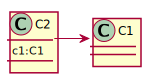

In [4]:
%%plantuml
@startuml
class C1
class C2 {
    c1:C1
}
C2->C1
@enduml

### 단계 1: 컨트랙 개발

현재 버전에서는 문제가 있어서  0.4.21이하에서는 문제가 없으나 그 이후에는 문제
https://github.com/ethereum/solidity/issues/3969

In [1]:
%%writefile src/C1C2.sol
pragma solidity 0.4.21;
contract C1 {
    uint128 v1;
    function set(uint128 _v1) public {
        v1=_v1;
    }
    function get() public view returns(uint128) {
        return v1;
    }
    function get7() public pure returns(uint128) {
        return 7;
    }
}

contract C2 {
    C1 c1;
    function C2() public {
        c1=new C1();
    }
    function set(uint128 _v1) public {
        c1.set(_v1);
    }
    function get() public view returns(uint128) {
        return c1.get();
    }
    function get7() public view returns(uint128) {
        return c1.get7();
    }
    function getC1Address() public view returns(address) {
        return address(c1);
    }
}

Overwriting src/C1C2.sol


### 단계 2: 컴파일

다음과 같이 버전을 낮추어 컴파일할 수 있다.
REMIX에서 버전을 낮추어 컴파일하고 ABI, bin을 가져온다.

--evm-version을 정해서 컴파일 할 수 있다.
여기서는 REMIX에서 version을 설정해서 컴파일 하기로 한다.


In [2]:
!solc --evm-version "homestead" --gas --abi --bin src/C1C2.sol

src/C1C2.sol:2:1: Error: Source file requires different compiler version (current compiler is 0.5.4+commit.9549d8ff.Linux.g++ - note that nightly builds are considered to be strictly less than the released version
contract C1 {
^------^


### 단계 3: 배포

In [10]:
%%writefile src/C1C2Deploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"get7","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"pure","type":"function"},{"constant":false,"inputs":[{"name":"_v1","type":"uint128"}],"name":"set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"get","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"}];
var _bin="6060604052341561000f57600080fd5b6101c08061001e6000396000f300606060405260043610610057576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063086949b71461005c5780634178462f146100a95780636d4ce63c146100de575b600080fd5b341561006757600080fd5b61006f61012b565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34156100b457600080fd5b6100dc60048080356fffffffffffffffffffffffffffffffff16906020019091905050610134565b005b34156100e957600080fd5b6100f161016f565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b60006007905090565b806000806101000a8154816fffffffffffffffffffffffffffffffff02191690836fffffffffffffffffffffffffffffffff16021790555050565b60008060009054906101000a90046fffffffffffffffffffffffffffffffff169050905600a165627a7a723058203c2a58ca7e692f195e04fef5b7d156940581717e5d6f1424fd02562a9892bdca0029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/C1C2Deploy.js


In [11]:
!node src/C1C2Deploy.js

contractAddress:  undefined
transactionHash:  0x4a016582527ff7e652c92d1b97b8c5f78b4a95b78a15af7ffdb5e3f9a27509eb
contractAddress:  0xa29e883731d7eb972ffe3fac7e652800ee0cd2d9
transactionHash:  0x4a016582527ff7e652c92d1b97b8c5f78b4a95b78a15af7ffdb5e3f9a27509eb


### 단계 4: 사용

In [18]:
%%writefile src/C1C2Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"get7","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"pure","type":"function"},{"constant":false,"inputs":[{"name":"_v1","type":"uint128"}],"name":"set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"get","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"}];
var _contract = web3.eth.contract(_abiArray);
var c2 = _contract.at("0xa29e883731d7eb972ffe3fac7e652800ee0cd2d9");
console.log(c2.get7.call().toNumber());
console.log(c2.set.sendTransaction(9,{from:web3.eth.accounts[0],gas:50000}));
console.log(c2.get.call().toNumber());

Overwriting src/C1C2Use.js


In [20]:
!node src/C1C2Use.js

7
0x0477fe68c6b3e1d454fad7bc29c559e74c0c86c8591b78a916cf3fb60db6d619
9


## 실습: 컨트랙 결합

이미 배포된 컨트랙을 결합하려고 하면, C2에 C1의 주소를 넘겨주어야 한다. 즉 C1을 배포하고 그 주소를 알야야 한다.
An easy way to access an instance of this in another contract is to simply cast an address as this contract:

### 단계 1: 컨트랙 개발 (C1)

In [21]:
%%writefile src/C1.sol
pragma solidity 0.4.21;
contract C1 {
    uint128 v1;
    function set(uint128 _v1) public {
        v1=_v1;
    }
    function get() public view returns(uint128) {
        return v1;
    }
    function get7() public pure returns(uint128) {
        return 7;
    }
}

Overwriting src/C1.sol


### 단계 2: 컴파일 (C1)

REMIX에서 0.4.21로 컴파일한 후

byzantium이 기본.
solc --evm-version "homestead" --gas C1.sol

### 단계 3: 배포 (C1)

In [24]:
%%writefile src/C1Deploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"get7","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"pure","type":"function"},{"constant":false,"inputs":[{"name":"_v1","type":"uint128"}],"name":"set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"get","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"}];
var _bin="6060604052341561000f57600080fd5b6101c08061001e6000396000f300606060405260043610610057576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063086949b71461005c5780634178462f146100a95780636d4ce63c146100de575b600080fd5b341561006757600080fd5b61006f61012b565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34156100b457600080fd5b6100dc60048080356fffffffffffffffffffffffffffffffff16906020019091905050610134565b005b34156100e957600080fd5b6100f161016f565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b60006007905090565b806000806101000a8154816fffffffffffffffffffffffffffffffff02191690836fffffffffffffffffffffffffffffffff16021790555050565b60008060009054906101000a90046fffffffffffffffffffffffffffffffff169050905600a165627a7a723058207f854b25855dd18a073ddcd783fefdd6c321506cd664d2e8eb24d51cc98556d20029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/C1Deploy.js


In [25]:
!node src/C1Deploy.js

contractAddress:  undefined
transactionHash:  0x7f19404cf1dfc5e09e54c129b73746186d4929b369b36e71e6bc65253727ff8e
contractAddress:  0x78ae31b10d935a03206a0c7a6dec988894a21ab8
transactionHash:  0x7f19404cf1dfc5e09e54c129b73746186d4929b369b36e71e6bc65253727ff8e


### 단계 4: 사용 (C1)

In [26]:
%%writefile src/C1Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"get7","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"pure","type":"function"},{"constant":false,"inputs":[{"name":"_v1","type":"uint128"}],"name":"set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"get","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"}];
var _contract = web3.eth.contract(_abiArray);
var c1 = _contract.at("0x78ae31b10d935a03206a0c7a6dec988894a21ab8");
console.log(c1.get7.call().toNumber());

Overwriting src/C1Use.js


In [27]:
!node src/C1Use.js

7


### 단계 1: 컨트랙 개발 (C2)

C1을 사용하는 C2를 개발한다.
REMIX에서 컴파일을 하면, 두 컨트랙의 ABI, bin을 얻을 수 있다.

In [73]:
%%writefile src/C2.sol
pragma solidity 0.4.21;
contract C1 {
    //uint128 v1;
    function set(uint128 _v1) public {
        //v1=_v1;
    }
    function get() public view returns(uint128) {
        //return v1;
    }
    function get7() public pure returns(uint128) {
        //return 7;
    }
}

contract C2 {
    C1 c1;
    function setC1(address _addressOfC1) public {
        c1 = C1(_addressOfC1);
    }
    function set(uint128 _v1) public {
        c1.set(_v1);
    }
    function get() public view returns(uint128) {
        return c1.get();
    }
    function get7() public view returns(uint128) {
        return c1.get7();
    }
    function getC1Address() public view returns(address) {
        return address(c1);
    }
}

Overwriting src/C2.sol


### 단계 3: 배포

In [28]:
%%writefile src/C2Deploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"get7","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_v1","type":"uint128"}],"name":"set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"get","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addressOfC1","type":"address"}],"name":"setC1","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getC1Address","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"}];
var _bin="6060604052341561000f57600080fd5b6104718061001e6000396000f30060606040526004361061006d576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063086949b7146100725780634178462f146100bf5780636d4ce63c146100f4578063cd89ad5d14610141578063dfa21f5e1461017a575b600080fd5b341561007d57600080fd5b6100856101cf565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34156100ca57600080fd5b6100f260048080356fffffffffffffffffffffffffffffffff16906020019091905050610271565b005b34156100ff57600080fd5b610107610337565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b341561014c57600080fd5b610178600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506103d9565b005b341561018557600080fd5b61018d61041c565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663086949b76040518163ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401602060405180830381600087803b151561025557600080fd5b5af1151561026257600080fd5b50505060405180519050905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16634178462f826040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff168152602001915050600060405180830381600087803b151561032457600080fd5b5af1151561033157600080fd5b50505050565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636d4ce63c6040518163ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401602060405180830381600087803b15156103bd57600080fd5b5af115156103ca57600080fd5b50505060405180519050905090565b806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff169050905600a165627a7a7230582092627f3a4c485737d85e578892676dcc0d2c672a8e41e93b004a53e07496a3c50029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/C2Deploy.js


In [29]:
!node src/C2Deploy.js

contractAddress:  undefined
transactionHash:  0x1e0695a6f4b142761140999a6e5951ae55f9dd2fe93075322d2c714729f1361e
contractAddress:  0x8384145a36524b6fac0aee96af9ad0228e91d0cf
transactionHash:  0x1e0695a6f4b142761140999a6e5951ae55f9dd2fe93075322d2c714729f1361e


### 단계 4: 사용

In [35]:
%%writefile src/C2Use.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"get7","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_v1","type":"uint128"}],"name":"set","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"get","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addressOfC1","type":"address"}],"name":"setC1","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getC1Address","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"}];
var _contract = web3.eth.contract(_abiArray);
var c2 = _contract.at("0x8384145a36524b6fac0aee96af9ad0228e91d0cf");
console.log(c2.get7.call().toNumber());
console.log(c2.setC1.sendTransaction("0x78ae31b10d935a03206a0c7a6dec988894a21ab8",{from:web3.eth.accounts[0]}));
console.log(c2.set.sendTransaction(123,{from:web3.eth.accounts[0],gas:50000}));
console.log(c2.get.call().toNumber());

Overwriting src/C2Use.js


In [36]:
!node src/C2Use.js

0
0xd586af26a649c7c29469bbe4f1550cb368d0580a8c09cf5e5d4329a5115975fe
0x91d28408f00427d3451039216c47c9b2c43123e8852b8906b259f109aed5d6bf
0


In [37]:
!node src/C2Use.js

7
0xbcda4f63b1196f74c796e3f14d0e33e5763c855a365a3c483c05c2cd8b0ba4ce
0xb7eefaf8ec2bce9c2fe87842d83bc0e1bbef1b38d322dfb60c1f9085fb1c0a28
123


## 실습: 자동차와 엔진

동일한 파일에 2개의 컨트랙을 넣어서 개발해 보자.

### 단계 1: 컨트랙 개발

In [4]:
%%writefile src/Car.sol
//pragma solidity ^0.5.0;
pragma solidity 0.4.21;
contract Car {
    Engine engineObj=new Engine();
	string private color;
	uint private maxSpeed;
	event printLog(string);
	function setColor(string memory _color) public {
		color=_color;
	}
	function getColor() public view returns(string memory) {
	    return color;
	}
	function setMaxSpeed(uint _maxSpeed) public {
		maxSpeed=_maxSpeed;
	}
	function getMaxSpeed() public view returns(uint) {
	    return maxSpeed;
	}
	function start() public {
	    engineObj.on();
	    //convert bool to string
	    string memory engineStateStr=engineObj.getEngineState()? "on" : "off";
	    emit printLog(engineStateStr);
	}
}

contract Engine {
    bool private engineState;
	function on() public {
		engineState=true;
	}
	function off() public {
	    engineState=false;
	}
	function getEngineState() public view returns(bool){
		return engineState;
	}
}

Overwriting src/Car.sol


### 단계 2: 컴파일
REMIX에서 0.4.21로 컴파일

### 단계 3: 배포

In [6]:
%%writefile src/carDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":false,"inputs":[{"name":"_color","type":"string"}],"name":"setColor","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getColor","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"start","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_maxSpeed","type":"uint256"}],"name":"setMaxSpeed","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getMaxSpeed","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"printLog","type":"event"}];
var _bin="606060405261000c610071565b604051809103906000f080151561002257600080fd5b6000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550341561006c57600080fd5b610081565b60405161013d8061065683390190565b6105c6806100906000396000f30060606040526004361061006d576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680639988fa69146100725780639a86139b146100cf578063be9a65551461015d578063d53e249514610172578063d54cb96714610195575b600080fd5b341561007d57600080fd5b6100cd600480803590602001908201803590602001908080601f016020809104026020016040519081016040528093929190818152602001838380828437820191505050505050919050506101be565b005b34156100da57600080fd5b6100e26101d8565b6040518080602001828103825283818151815260200191508051906020019080838360005b83811015610122578082015181840152602081019050610107565b50505050905090810190601f16801561014f5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561016857600080fd5b610170610280565b005b341561017d57600080fd5b61019360048080359060200190919050506104cd565b005b34156101a057600080fd5b6101a86104d7565b6040518082815260200191505060405180910390f35b80600190805190602001906101d49291906104e1565b5050565b6101e0610561565b60018054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156102765780601f1061024b57610100808354040283529160200191610276565b820191906000526020600020905b81548152906001019060200180831161025957829003601f168201915b5050505050905090565b610288610561565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166367b7c0346040518163ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401600060405180830381600087803b151561030c57600080fd5b5af1151561031957600080fd5b5050506000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16622dcce56040518163ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401602060405180830381600087803b151561039f57600080fd5b5af115156103ac57600080fd5b505050604051805190506103f5576040805190810160405280600381526020017f6f6666000000000000000000000000000000000000000000000000000000000081525061042c565b6040805190810160405280600281526020017f6f6e0000000000000000000000000000000000000000000000000000000000008152505b90507f68d255efcaa062895d3889d0e53f99389409361c6f0735ef9542be5ca11d1343816040518080602001828103825283818151815260200191508051906020019080838360005b83811015610490578082015181840152602081019050610475565b50505050905090810190601f1680156104bd5780820380516001836020036101000a031916815260200191505b509250505060405180910390a150565b8060028190555050565b6000600254905090565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061052257805160ff1916838001178555610550565b82800160010185558215610550579182015b8281111561054f578251825591602001919060010190610534565b5b50905061055d9190610575565b5090565b602060405190810160405280600081525090565b61059791905b8082111561059357600081600090555060010161057b565b5090565b905600a165627a7a72305820433b9b77d252093bca232732f1304039f5112cc9e7aa3c4431331a8be1c9ebc200296060604052341561000f57600080fd5b61011f8061001e6000396000f3006060604052600436106052576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680622dcce51460575780636626b26d14608157806367b7c034146093575b600080fd5b3415606157600080fd5b606760a5565b604051808215151515815260200191505060405180910390f35b3415608b57600080fd5b609160bb565b005b3415609d57600080fd5b60a360d7565b005b60008060009054906101000a900460ff16905090565b60008060006101000a81548160ff021916908315150217905550565b60016000806101000a81548160ff0219169083151502179055505600a165627a7a72305820f6201376f356064fbcb7d6f8cc24e4de4521e1c7b01c5ae2ed6eb35f53899f680029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/carDeploy.js


In [8]:
!node src/carDeploy.js

contractAddress:  undefined
transactionHash:  0xaa35cf9932f8315b49827b3f8d7f84c54204f2720de4ca9e244ade40e42fead2
contractAddress:  0x2a5a8b6930d52e6908a4062665e58985abfb775e
transactionHash:  0xaa35cf9932f8315b49827b3f8d7f84c54204f2720de4ca9e244ade40e42fead2


### 단계 4: 사용
아래를 실행하면 다음 결과

```python
> car.getColor.call();
'RED'
```

In [11]:
%%writefile src/carUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"_color","type":"string"}],"name":"setColor","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getColor","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"start","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_maxSpeed","type":"uint256"}],"name":"setMaxSpeed","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getMaxSpeed","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"string"}],"name":"printLog","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var car = _contract.at("0x2a5a8b6930d52e6908a4062665e58985abfb775e");
var filter = car.printLog(function (error, result) {
  if (!error)
    console.log(result);
});
car.setColor.sendTransaction("RED",{from:web3.eth.accounts[0],gas:100000});
console.log(car.start({from:web3.eth.accounts[0],gas:2000000}));

Overwriting src/carUse.js


In [ ]:
!node src/carUse.js

0x027d7c218c3c8ab9c6ad2e42910ad49d558198a4c3c7cca4232301c14d7fce2c
{ address: '0x2a5a8b6930d52e6908a4062665e58985abfb775e',
  blockNumber: 242,
  transactionHash: '0x027d7c218c3c8ab9c6ad2e42910ad49d558198a4c3c7cca4232301c14d7fce2c',
  transactionIndex: 1,
  blockHash: '0x1b18e3354aa40a3d0120c6fcf578ccabf1b2b37923bb59de6a34d6ad0202c107',
  logIndex: 0,
  removed: false,
  event: 'printLog',
  args: { '': 'on' } }


## 실습: 사각형 면적

SquareArea passing address

### 단계 1: 컨트랙 개발

In [17]:
%%writefile src/SquareArea.sol
pragma solidity 0.4.21;
contract Square {
    uint128 length;
    function getLength() public view returns(uint128) {
        return length;
    }
    function setLength(uint128 _length) public {
        length=_length;
    }
    function getDegree() public pure returns(uint128) {
        return 90;
    }
    function calcPerimeter() public payable returns(uint128) {
        return length*4;
    }
}

contract Area {
    Square s;
    address owner;
    event PrintLog(uint128);
    //constructor() public {
    function Area() public {
        s=new Square();
        owner=msg.sender;
    }
    function changeSquare(address _addressOfSquare) public {
        s=Square(_addressOfSquare);
    }
    function calcArea() public returns(uint128) {
        uint128 length=s.getLength();
        uint128 area=length*length;
        emit PrintLog(area);
        return area;
    }
    function setLength(uint128 _length) public {
        s.setLength(_length);
    }
    function getLength() public view returns(uint128) {
        return s.getLength();
    }
    function getDegree() public view returns(uint128) {
        return s.getDegree();
    }
    function getSquareAddress() public view returns(address) {
        return address(s);
    }
    function getPerimeter() payable public returns(uint128) {
        // note the parentheses at the end to call function
        return s.calcPerimeter.value(msg.value)();
    }
}

Overwriting src/SquareArea.sol


### 단계 2: 컴파일
REMIX compile


### 단계 3: 컨트랙 배포

In [9]:
%%writefile src/SquareAreaDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var areaContract = web3.eth.contract([{"constant":true,"inputs":[],"name":"getDegree","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"calcArea","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_length","type":"uint128"}],"name":"setLength","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"getPerimeter","outputs":[{"name":"","type":"uint128"}],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[],"name":"getSquareAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getLength","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addressOfSquare","type":"address"}],"name":"changeSquare","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint128"}],"name":"PrintLog","type":"event"}]);
var area = areaContract.new(
   {
     from: web3.eth.accounts[0], 
     data: '0x6060604052341561000f57600080fd5b6100176100b2565b604051809103906000f080151561002d57600080fd5b6000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555033600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506100c2565b6040516102538061079483390190565b6106c3806100d16000396000f300606060405260043610610083576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680632b261317146100885780633b65f8d0146100d55780633d7c610c146101225780637ebeb19c14610157578063ba0c2de514610199578063be1c766b146101ee578063e70483d91461023b575b600080fd5b341561009357600080fd5b61009b610274565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34156100e057600080fd5b6100e8610316565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b341561012d57600080fd5b61015560048080356fffffffffffffffffffffffffffffffff16906020019091905050610420565b005b61015f6104e6565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34156101a457600080fd5b6101ac610589565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34156101f957600080fd5b6102016105b2565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b341561024657600080fd5b610272600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610654565b005b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16632b2613176040518163ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401602060405180830381600087803b15156102fa57600080fd5b5af1151561030757600080fd5b50505060405180519050905090565b60008060008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663be1c766b6040518163ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401602060405180830381600087803b151561039f57600080fd5b5af115156103ac57600080fd5b50505060405180519050915081820290507f34a99e9e3ecfa3c62497b1df91156bf48c1699b98b276bf7d052bd1938575c7b8160405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390a1809250505090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16633d7c610c826040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff168152602001915050600060405180830381600087803b15156104d357600080fd5b5af115156104e057600080fd5b50505050565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16637eb510a2346040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004016020604051808303818588803b151561056c57600080fd5b5af1151561057957600080fd5b5050505060405180519050905090565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16905090565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663be1c766b6040518163ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401602060405180830381600087803b151561063857600080fd5b5af1151561064557600080fd5b50505060405180519050905090565b806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550505600a165627a7a72305820e21155e188700777b76c6d4199ea55b3ef94d1e34e50cd0ccf505f0c091c9f2200296060604052341561000f57600080fd5b6102358061001e6000396000f300606060405260043610610062576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680632b261317146100675780633d7c610c146100b45780637eb510a2146100e9578063be1c766b1461012b575b600080fd5b341561007257600080fd5b61007a610178565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34156100bf57600080fd5b6100e760048080356fffffffffffffffffffffffffffffffff16906020019091905050610181565b005b6100f16101bc565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b341561013657600080fd5b61013e6101e4565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6000605a905090565b806000806101000a8154816fffffffffffffffffffffffffffffffff02191690836fffffffffffffffffffffffffffffffff16021790555050565b600060046000809054906101000a90046fffffffffffffffffffffffffffffffff1602905090565b60008060009054906101000a90046fffffffffffffffffffffffffffffffff169050905600a165627a7a723058200b498e3eba429888268a0dfb31f9254001834564b63b074d05fc596e113b55cb0029', 
     gas: '4700000'
   }, function (e, contract){
    //console.log(e, contract);
    if (typeof contract.address !== 'undefined') {
         console.log('Contract mined! address: ' + contract.address + ' transactionHash: ' + contract.transactionHash);
    }
 })

Overwriting src/SquareAreaDeploy.js


In [10]:
!node src/SquareAreaDeploy.js

Contract mined! address: 0xf5773eeb8274ec5ac60028aeed01c35979b82a2a transactionHash: 0xe904814e53f2029b9aceb52124d207438baa00b6530ee692e3ad9668b2f369d2


### 단계 4: 사용

In [ ]:
```python
> sqArea.getDegree();
BigNumber { s: 1, e: 1, c: [ 90 ] }
> sqArea.setLength(9,{from:web3.eth.accounts[0]});
'0x4fe7b1922a7b60b04ac65b5d7132b75eee9077e0841f791698d3553a02d3991f'
> //miner.start(1);admin.sleepBlocks(1);miner.stop();
undefined
> sqArea.getLength.call().toNumber();
9
> sqArea.calcArea.sendTransaction({from:web3.eth.accounts[0]});
'0x60cd0d11a4c9b5b16d9cc2842d7d5bcdfa1bc58248247ae90ef5c9fb254be50c'
> //miner.start(1);admin.sleepBlocks(1);miner.stop();
undefined
> sqArea.calcArea.call();                                             로컬에서 처리되기 때문에 이전 면적계산 값 81을 반환
BigNumber { s: 1, e: 1, c: [ 81 ] }
> sqArea.getSquareAddress();
'0x28fbc65ef112bc4a1bca4560e3debc12e9849ea5'
```

처음 실행하면 길이는 0이다. 그 다음 실행하면 9가 된다. 그 이유는 asynch방식이라 마이닝하지 않고 연달아 시행하면 마이닝 전의 결과가 나오기 때문에 그렇다.

In [16]:
%%writefile src/SquareAreaUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var areaContract = web3.eth.contract([{"constant":true,"inputs":[],"name":"getDegree","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"calcArea","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_length","type":"uint128"}],"name":"setLength","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"getPerimeter","outputs":[{"name":"","type":"uint128"}],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[],"name":"getSquareAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getLength","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addressOfSquare","type":"address"}],"name":"changeSquare","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint128"}],"name":"PrintLog","type":"event"}]);
var sqArea = areaContract.at("0xf5773eeb8274ec5ac60028aeed01c35979b82a2a");
//var filter = sqArea.PrintLog(function (error, result) {
//  if (!error)
//    console.log(result);
//});
console.log(sqArea.getDegree().toNumber());
console.log(sqArea.setLength(9,{from:web3.eth.accounts[0]}));
console.log(sqArea.getLength.call().toNumber());
console.log(sqArea.calcArea.sendTransaction({from:web3.eth.accounts[0]}));
console.log(sqArea.calcArea.call().toNumber());
console.log(sqArea.getSquareAddress().toString());

Overwriting src/SquareAreaUse.js


In [17]:
!node src/SquareAreaUse.js

90
0xf0920dd13005196580b9d63f86a000c0035711ebcdaf046031df3f1072c7410c
9
0x4c5bc032fd2344d49a5adc917693342574d91e86ae6f3e2ef4d9aa89d27983ef
81
0x28fbc65ef112bc4a1bca4560e3debc12e9849ea5


## 실습: 위 코드의 Square 주소를 사용해서 해보자

변경하고 나서 주소가 변경되었는지 확인하고 해보자.
console.log(sqArea.changeSquare.sendTransaction("0xbaef8a3ac13776b62c6386736aa22fd3e9ded451",{from:web3.eth.accounts[0]}));
console.log(sqArea.getSquareAddress().toString());

### 단계 3: 컨트랙 배포

새로 SquareDeploy

In [1]:
%%writefile src/SquareDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":false,"inputs":[{"name":"_length","type":"uint128"}],"name":"setLength","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getLength","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"}];
var _bin="608060405234801561001057600080fd5b50610166806100206000396000f3fe608060405234801561001057600080fd5b5060043610610053576000357c0100000000000000000000000000000000000000000000000000000000900480633d7c610c14610058578063be1c766b14610098575b600080fd5b6100966004803603602081101561006e57600080fd5b8101908080356fffffffffffffffffffffffffffffffff1690602001909291905050506100da565b005b6100a0610115565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b806000806101000a8154816fffffffffffffffffffffffffffffffff02191690836fffffffffffffffffffffffffffffffff16021790555050565b60008060009054906101000a90046fffffffffffffffffffffffffffffffff1690509056fea165627a7a72305820e64083eb9f152ac1269ab73999a880e33cffa8ee0daa76b0e6e83dd0086fd63d0029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Writing src/SquareDeploy.js


In [1]:
!node src/SquareDeploy.js

contractAddress:  undefined
transactionHash:  0xbea4e2deaa35cd7f6d81174ca2c0cdd17626a0d419d19764fc0cecc7dab0b70e
contractAddress:  0x599c616ca5ad2ffbc532509dd1e1fb2ef854f34a
transactionHash:  0xbea4e2deaa35cd7f6d81174ca2c0cdd17626a0d419d19764fc0cecc7dab0b70e


### 단계 4: 사용

In [2]:
%%writefile src/SquareUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"_length","type":"uint128"}],"name":"setLength","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getLength","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"}];
var _contract = web3.eth.contract(_abiArray);
var square = _contract.at("0x599c616ca5ad2ffbc532509dd1e1fb2ef854f34a");
console.log(square.setLength.sendTransaction(9,{from:web3.eth.accounts[0],gas:50000}));;
console.log(square.getLength.call().toNumber());

Overwriting src/SquareUse.js


In [18]:
!node src/SquareUse.js

0x99da1b7d7d54fd2e5d8235692700dcf027cd944cdd5640c035032788efec0f50
9



새로 배포된 Square의 주소를 사용해 보자
```python
0xf5773eeb8274ec5ac60028aeed01c35979b82a2a --> 0x599c616ca5ad2ffbc532509dd1e1fb2ef854f34a
```

??그런데 왜 주소가 뒤바뀌어서 나올까????

In [19]:
%%writefile src/SquareAreaUseChangeAddr.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var areaContract = web3.eth.contract([{"constant":true,"inputs":[],"name":"getDegree","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"calcArea","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_length","type":"uint128"}],"name":"setLength","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"getPerimeter","outputs":[{"name":"","type":"uint128"}],"payable":true,"stateMutability":"payable","type":"function"},{"constant":true,"inputs":[],"name":"getSquareAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getLength","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addressOfSquare","type":"address"}],"name":"changeSquare","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint128"}],"name":"PrintLog","type":"event"}]);
var sqArea = areaContract.at("");
//var filter = sqArea.PrintLog(function (error, result) {
//  if (!error)
//    console.log(result);
//});
console.log(sqArea.changeSquare.sendTransaction("0x599c616ca5ad2ffbc532509dd1e1fb2ef854f34a",{from:web3.eth.accounts[0]}));
console.log(sqArea.getSquareAddress.call().toString());
console.log(sqArea.getDegree().toNumber());
console.log(sqArea.setLength(9,{from:web3.eth.accounts[0]}));
console.log(sqArea.getLength.call().toNumber());
console.log(sqArea.calcArea.sendTransaction({from:web3.eth.accounts[0]}));
console.log(sqArea.calcArea.call().toNumber());
console.log(sqArea.getSquareAddress().toString());

Writing src/SquareAreaUseChangeAddr.js


In [20]:
!node src/SquareAreaUseChangeAddr.js

0x044dc75bc49b78b3eb7bd2d7f0cce8f4e65d056ce88a0a9216962ec59222b1fd
0x28fbc65ef112bc4a1bca4560e3debc12e9849ea5
90
0xa26ddd91a216645f9a0fac42643b5e6cf6d5113481b7559f8c369e1ffea1705e
9
0xac518346330a2b1c1dfd08be382633030b89f6e0e4442bd97aeb6a09eb5a3760
81
0x28fbc65ef112bc4a1bca4560e3debc12e9849ea5


## 실습: 사각형 면적

LAB SquareArea using import

In [ ]:
%%writefile src/Square.sol
pragma solidity ^0.5.0;
contract Square {
    uint128 length;
    function getLength() public view returns(uint128) {
        return length;
    }
    function setLength(uint128 _length) public {
        length=_length;
    }
    function getDegree() public pure returns(uint128) {
        return 90;
    }
}

%%writefile src/Area.sol
pragma solidity ^0.5.0;

import "./Square.sol";

contract Area {
    Square snew;
    address addressOfSquare;
    address owner;
    event PrintLog(uint128);
    constructor() public {
        snew=new Square();
        owner=msg.sender;
    }
    function changeSquare(address _addressOfSquare) public {
        //s=Square(_addressOfSquare);
        addressOfSquare=address(_addressOfSquare);
    }
    function calcArea() public returns(uint128) {
        //s.setLength(9);  //s.getLength() may not work?? because of asynch
        Square s=Square(addressOfSquare);
        uint128 length=s.getLength();
        uint128 area=length*length;
        emit PrintLog(area);
        return area;
    }
    function setLength(uint128 _length) public {
        Square s=Square(addressOfSquare);
        s.setLength(_length);
    }
    function getLength() public view returns(uint128) {
        Square s=Square(addressOfSquare);
        return s.getLength();
    }
    function getDegree() public view returns(uint128) {
        Square s=Square(addressOfSquare);
        return s.getDegree();
    }
    function getSquareAddress() public view returns(address) {
        return address(addressOfSquare);
    }
    function getSnewAddress() public view returns(address) {
        return address(snew);
    }
    function getSnewDegree() public view returns(uint128) {
        return snew.getDegree();
    }
}

In [43]:
!solc --gas --abi --bin src/Area.sol

%%writefile src/AreaDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[],"name":"getSnewDegree","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getSnewAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getDegree","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"calcArea","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_length","type":"uint128"}],"name":"setLength","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getSquareAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getLength","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addressOfSquare","type":"address"}],"name":"changeSquare","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint128"}],"name":"PrintLog","type":"event"}];
var _bin="608060405234801561001057600080fd5b506100196100bb565b604051809103906000f080158015610035573d6000803e3d6000fd5b506000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555033600260006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506100cb565b6040516101dc806108cc83390190565b6107f2806100da6000396000f3fe608060405234801561001057600080fd5b50600436106100a5576000357c0100000000000000000000000000000000000000000000000000000000900480633d7c610c116100785780633d7c610c146101ba578063ba0c2de5146101fa578063be1c766b14610244578063e70483d914610286576100a5565b806303c521a0146100aa578063140b1b7b146100ec5780632b261317146101365780633b65f8d014610178575b600080fd5b6100b26102ca565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6100f461038f565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b61013e6103b8565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b610180610483565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6101f8600480360360208110156101d057600080fd5b8101908080356fffffffffffffffffffffffffffffffff1690602001909291905050506105b7565b005b61020261068d565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b61024c6106b7565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6102c86004803603602081101561029c57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610782565b005b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16632b2613176040518163ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040160206040518083038186803b15801561034f57600080fd5b505afa158015610363573d6000803e3d6000fd5b505050506040513d602081101561037957600080fd5b8101908080519060200190929190505050905090565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16905090565b600080600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690508073ffffffffffffffffffffffffffffffffffffffff16632b2613176040518163ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040160206040518083038186803b15801561044257600080fd5b505afa158015610456573d6000803e3d6000fd5b505050506040513d602081101561046c57600080fd5b810190808051906020019092919050505091505090565b600080600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16905060008173ffffffffffffffffffffffffffffffffffffffff1663be1c766b6040518163ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040160206040518083038186803b15801561050f57600080fd5b505afa158015610523573d6000803e3d6000fd5b505050506040513d602081101561053957600080fd5b81019080805190602001909291905050509050600081820290507f34a99e9e3ecfa3c62497b1df91156bf48c1699b98b276bf7d052bd1938575c7b8160405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390a180935050505090565b6000600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690508073ffffffffffffffffffffffffffffffffffffffff16633d7c610c836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff168152602001915050600060405180830381600087803b15801561067157600080fd5b505af1158015610685573d6000803e3d6000fd5b505050505050565b6000600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16905090565b600080600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690508073ffffffffffffffffffffffffffffffffffffffff1663be1c766b6040518163ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040160206040518083038186803b15801561074157600080fd5b505afa158015610755573d6000803e3d6000fd5b505050506040513d602081101561076b57600080fd5b810190808051906020019092919050505091505090565b80600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055505056fea165627a7a723058200cd14500aba5af88556902c589d223f5c4e4ff1a2a8280694f47d861f55daead0029608060405234801561001057600080fd5b506101bc806100206000396000f3fe608060405234801561001057600080fd5b506004361061005e576000357c0100000000000000000000000000000000000000000000000000000000900480632b261317146100635780633d7c610c146100a5578063be1c766b146100e5575b600080fd5b61006b610127565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6100e3600480360360208110156100bb57600080fd5b8101908080356fffffffffffffffffffffffffffffffff169060200190929190505050610130565b005b6100ed61016b565b60405180826fffffffffffffffffffffffffffffffff166fffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6000605a905090565b806000806101000a8154816fffffffffffffffffffffffffffffffff02191690836fffffffffffffffffffffffffffffffff16021790555050565b60008060009054906101000a90046fffffffffffffffffffffffffffffffff1690509056fea165627a7a7230582033bab3e5f7db8dad8b2d884085308b6b83386d4a026c42d2d0ce75ab3ddfac150029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

!node src/AreaDeploy.js

%%writefile src/AreaUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[],"name":"getSnewDegree","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getSnewAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getDegree","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"calcArea","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_length","type":"uint128"}],"name":"setLength","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getSquareAddress","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getLength","outputs":[{"name":"","type":"uint128"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_addressOfSquare","type":"address"}],"name":"changeSquare","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint128"}],"name":"PrintLog","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var sqArea = _contract.at("0x24e77dda2d4a82ae25664b396c7eb95c0ee40c1b");
//var filter = sqArea.PrintLog(function (error, result) {
//  if (!error)
//    console.log(result);
//});
//console.log(sqArea.changeSquare.sendTransaction("0x599c616ca5ad2ffbc532509dd1e1fb2ef854f34a",{from:web3.eth.accounts[0]}));
var addressOfSquare=sqArea.getSnewAddress.call();
console.log(sqArea.changeSquare.sendTransaction(addressOfSquare,{from:web3.eth.accounts[0]}));
console.log(sqArea.getSquareAddress.call().toString());
console.log(sqArea.getDegree.call().toString());
console.log(sqArea.getSnewAddress.call().toString());
console.log(sqArea.getSnewDegree.call().toString());
console.log(sqArea.setLength.sendTransaction(9,{from:web3.eth.accounts[0]}));
console.log(sqArea.getLength.call().toNumber());
//console.log(sqArea.calcArea.sendTransaction({from:web3.eth.accounts[0]}));
console.log(sqArea.calcArea.call().toNumber());

!node src/AreaUse.js

!node src/AreaUse.js

Writing src/Square.sol


## 문제: Observer pattern

* 출처: https://learnxinyminutes.com/docs/solidity/

In [ ]:
contract SomeOracleCallback {
    function oracleCallback(int _value, uint _time, bytes32 info) external;
}

contract SomeOracle {
    SomeOracleCallback[] callbacks; // array of all subscribers

    // Register subscriber
    function addSubscriber(SomeOracleCallback a) {
        callbacks.push(a);
    }

    function notify(value, time, info) private {
        for(uint i = 0;i < callbacks.length; i++) {
            // all called subscribers must implement the oracleCallback
            callbacks[i].oracleCallback(value, time, info);
        }
    }

    function doSomething() public {
        // Code to do something

        // Notify all subscribers
        notify(_value, _time, _info);
    }
}

## 9.10 상속
<a id='S.8'></a>

* 상속
        * abstract contract

## 실습: greeter.sol

* 출처 https://www.ethereum.org/greeter
* 복수 contract을 컴파일하고, 서로 참조하는 경우

### greeter: multicontracts

```
http://www.textfixer.com/tools/remove-line-breaks.php
> greeterCompiled=eth.compile.solidity(greeterSource)

> var _greeting = "Hello World!"
> var greeterContract=eth.contract(greeterCompiled.greeter.info.abiDefinition)
> var greeter=greeterContract.new(_greeting,{from:primary,data:greeterCompiled.greeter.code})
> miner.start(1);admin.sleepBlocks(1);miner.stop();
왜 주소가 없지 (블럭체인에 올렸어도????) -> 그래서 주소를 구함.
> greeter
{
  address: undefined,
  transactionHash: '0xff797aa7035d006c7c6ce9f6e86822d3d86eba7281ce5688ce8f7a1952ac4608'
}
> eth.getTransactionReceipt(greeter.transactionHash)
{
  blockHash: '0xb9234f34c43d8cf805e63a27420379af68b96a8fab75b7681e9bfa6f1b7a31bd',
  blockNumber: 9,
  contractAddress: '0xb597d92b1436325499e1b11bc3aee3ce2ced196e',
  cumulativeGasUsed: 90000,
  gasUsed: 90000,
  logs: [ ],
  transactionHash: '0xff797aa7035d006c7c6ce9f6e86822d3d86eba7281ce5688ce8f7a1952ac4608',
  transactionIndex: 0
}
> _greeterAddr=eth.getTransactionReceipt(greeter.transactionHash).contractAddress
'0xb597d92b1436325499e1b11bc3aee3ce2ced196e'
> myGreeter=eth.contract(greeterCompiled.greeter.info.abiDefinition).at(_greeterAddr)
{
  address: '0xb597d92b1436325499e1b11bc3aee3ce2ced196e',
  allEvents: function (),
  greet: function (),
  kill: function ()
}
> myGreeter.greet.call()
new BigNumber() not a base 16 number: 
    at <unknown>
    at <unknown>
    at <unknown>
    at <unknown>
    at <unknown>
    at <unknown>
    at <unknown>
    at <unknown>
    at <unknown>
    at greet (<anonymous>:-93978:-18)
    at <anonymous>:1:1
뭔가 잘못 (블럭코드 주소) - 컨트랙이 2개라서????
> _greeterAddr
'0xb597d92b1436325499e1b11bc3aee3ce2ced196e'
> eth.getCode(_greeterAddr)
'0x'

var greeter = greeterContract.new(_greeting,{from:web3.eth.accounts[0], data: greeterCompiled.greeter.code, gas: 1000000}, function(e, contract){
  if(!e) {
    if(!contract.address) {
      console.log("Contract transaction send: TransactionHash: " + contract.transactionHash " waiting to be mined...");
    } else {
      console.log("Contract mined! Address: " + contract.address);
      console.log(contract);
    }
  }
})

* blockchain
eth.getTransaction(addr)
eth.blockNumber

* registrar
    > primary = eth.accounts[0];
    '0xa5cd6f89bb6100aa6c1f634fa5937f0b201ff43c'
    > globalRegistrarAddr = admin.setGlobalRegistrar("", primary);
    Please unlock account a5cd6f89bb6100aa6c1f634fa5937f0b201ff43c.
    Passphrase: 
    Account is now unlocked for this session.
    '0x89101a18ba7d97c35bcff99e8f2d290ecd9e9faabc8b4b36200b237d9974545d'
    > globalRegistrarAddr
    '0x89101a18ba7d97c35bcff99e8f2d290ecd9e9faabc8b4b36200b237d9974545d'
    > 
```

### 단계 1: 컨트랙 개발

Solidity 0.5.0부터 address and address payable로 타잎이 구분되었다.
selfdestruct는 컨트랙을 삭제하는 경우, 잔액을 반환하는 주소.

In [17]:
%%writefile src/greeter.sol
pragma solidity ^0.5.0;
contract mortal {
    /* Define variable owner of the type address*/
    address payable owner;

    /* this function is executed at initialization and sets the owner of the contract */
    constructor() public { owner = msg.sender; }

    /* Function to recover the funds on the contract */
    function kill() public { if (msg.sender == owner) selfdestruct(owner); }
}

contract greeter is mortal {
    /* define variable greeting of the type string */
    string greeting;

    /* this runs when the contract is executed */
    constructor(string memory _greeting) public {
        greeting = _greeting;
    }

    /* main function */
    function greet() public view returns (string memory) {
        return greeting;
    }
}

Overwriting src/greeter.sol


### 단계 2: 컴파일

In [19]:
!solc --abi src/greeter.sol


======= src/greeter.sol:greeter =======
Contract JSON ABI 
[{"constant":false,"inputs":[],"name":"kill","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"greet","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_greeting","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"}]

======= src/greeter.sol:mortal =======
Contract JSON ABI 
[{"constant":false,"inputs":[],"name":"kill","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"}]


In [21]:
!solc --bin src/greeter.sol


======= src/greeter.sol:greeter =======
Binary: 
608060405234801561001057600080fd5b506040516103db3803806103db8339810180604052602081101561003357600080fd5b81019080805164010000000081111561004b57600080fd5b8281019050602081018481111561006157600080fd5b815185600182028301116401000000008211171561007e57600080fd5b5050929190505050336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555080600190805190602001906100dc9291906100e3565b5050610188565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061012457805160ff1916838001178555610152565b82800160010185558215610152579182015b82811115610151578251825591602001919060010190610136565b5b50905061015f9190610163565b5090565b61018591905b80821115610181576000816000905550600101610169565b5090565b90565b610244806101976000396000f3fe608060405234801561001057600080fd5b5060043610610053576000357c01000000000000000000000000000000000000000000000000000000009004806341c0e1b514

In [20]:
!solc --gas src/greeter.sol


======= src/greeter.sol:greeter =======
Gas estimation:
construction:
   infinite + 116000 = infinite
external:
   greet():	infinite
   kill():	30635

======= src/greeter.sol:mortal =======
Gas estimation:
construction:
   20371 + 54000 = 74371
external:
   kill():	30635


### 단계 3: 컨트랙 배포

배포할 경우 superclass는 이미 포함되므로 greeter abi, bin만 넣어서 배포한다.
constrcutor가 문자열을 인자로 받으므로 hello jsl을 넣어준다.

In [25]:
%%writefile src/greeter.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[],"name":"kill","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"greet","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_greeting","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"}];
var _bin="0x"+"608060405234801561001057600080fd5b506040516103db3803806103db8339810180604052602081101561003357600080fd5b81019080805164010000000081111561004b57600080fd5b8281019050602081018481111561006157600080fd5b815185600182028301116401000000008211171561007e57600080fd5b5050929190505050336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555080600190805190602001906100dc9291906100e3565b5050610188565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061012457805160ff1916838001178555610152565b82800160010185558215610152579182015b82811115610151578251825591602001919060010190610136565b5b50905061015f9190610163565b5090565b61018591905b80821115610181576000816000905550600101610169565b5090565b90565b610244806101976000396000f3fe608060405234801561001057600080fd5b5060043610610053576000357c01000000000000000000000000000000000000000000000000000000009004806341c0e1b514610058578063cfae321714610062575b600080fd5b6100606100e5565b005b61006a610176565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156100aa57808201518184015260208101905061008f565b50505050905090810190601f1680156100d75780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415610174576000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16ff5b565b606060018054600181600116156101000203166002900480601f01602080910402602001604051908101604052809291908181526020018280546001816001161561010002031660029004801561020e5780601f106101e35761010080835404028352916020019161020e565b820191906000526020600020905b8154815290600101906020018083116101f157829003601f168201915b505050505090509056fea165627a7a72305820baad8d78174d9288c9240f9d06b886a4e3cb19c1fa71fc14517e70cd520978180029";
var _contract = web3.eth.contract(_abiArray);
var _instance=_contract.new("hello jsl",{data:_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
  if (!err && contract.address)
    console.log("contractAddress: ", contract.address);
    console.log("transactionHash: ", contract.transactionHash);
});

Overwriting src/greeter.js


In [26]:
!node src/greeter.js

transactionHash:  0xead1a6dca2fced9e07dde0869642343ca01d9b6e763d0ffda5cd817418a41b2a
contractAddress:  0x40dc58fc998d6ed4a384e01d89ba297d5bea2863
transactionHash:  0xead1a6dca2fced9e07dde0869642343ca01d9b6e763d0ffda5cd817418a41b2a


### 단계 4: 사용

In [27]:
%%writefile src/greeterUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[],"name":"kill","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"greet","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_greeting","type":"string"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"}];
var greeterContract = web3.eth.contract(_abiArray);
var greeter = greeterContract.at("0x40dc58fc998d6ed4a384e01d89ba297d5bea2863");
/*var event = e_test.Event(function (error, result) {
    if (!error) {
        console.log("e_test: event triggered =====> ",result);
        process.exit(1);
    }
});*/
console.log(greeter.greet({from:web3.eth.accounts[0],gas:100000}));

Writing src/greeterUse.js


In [28]:
!node src/greeterUse.js

hello jsl


### 9.11  Library
<a id='S.9'></a>

현재 파일에서 다른 Solidity 파일을 가져와 사용할 경우

라이브러리는 한 번 배포되고 나면 또 할 필요가 없다.
gas가 절약될 수 있다.
payable 함수를 가질 수 없고, fallback 함수 역시 가질 수 없다.
* public으로 할 수 있는지? 이러면 gas비용 문제가 나옴.
현재 제한점:
* No state variables
* Cannot inherit nor be inherited
* Cannot receive Ether

* library함수가 **public**으로 선언한 경우, **placeholder가 있다**. 외부에서 사용할 수 있으므로 별도로 배포해서 link해야 한다.
* library함수가 **internal**로 선언한 경우, **placeholder가 없다**. 그냥 **library 코드가 콘트랙에 포함**된다. link를 할 필요가 없다.


Library linking
- bytecode에 

If your contracts use libraries, you will notice that the bytecode contains substrings of the form
__$53aea86b7d70b31448b230b20ae141a537$__. These are placeholders for the actual library addresses.
딱 40자리

"608060405234801561001057600080fd5b50610165806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480630dbe671f1461004d575b600080fd5b610055610097565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b600073__$5c242dfd7cde51a2f46c69c18a9365f8ca$__630dbe671f6040518163ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040160206040518083038186803b1580156100f957600080fd5b505af415801561010d573d6000803e3d6000fd5b505050506040513d602081101561012357600080fd5b810190808051906020019092919050505090509056fea165627a7a72305820b5b291f61f2afe00134c27d9332e72fd44847900fbc312a4f9ad1f1a29a537b60029"

### 9.11.1 library internal

```Using MyLib for <<Type>>```는 MyLib을 <<Type>>에 붙여서 사용하겠다는 의미이다.
```Using MyLib for uint```는 uint타잎에 ```Using MyLib for *```는 어떤 타잎이든 붙여 사용하겠다는 의미이다.

첫째 인자는 Python의 self와 같이 자신이 된다. 즉 첫째인자를 객체와 같이 간주하고 자신에게 함수를 붙여 사용한다.

```python
using myLib for uint;
uint result = num.multiply7();
```

## 실습: 라이브러리

### 단계 1: 컨트랙 개발

In [1]:
%%writefile src/LibraryTest.sol
pragma solidity ^0.5.0;

//Just downloaded StringUtils.sol from github.com
//import "github.com/ethereum/dapp-bin/library/stringUtils.sol";
//import "./StringUtils.sol";

library myLib {
    //public (pure or view) not working without linking
    //function multiply7(uint num) public pure returns (uint) {
    function multiply7(uint num) internal pure returns (uint) {
      return num * 7;
   }
}
contract LibrayTest {
    //event PrintLog(bool);
    event PrintLog(uint);
    //function equal() public returns (bool){
    //    bool isEqual=StringUtils.equal("hello", "world");
    //    emit PrintLog(isEqual);
    //    return isEqual;
    //}
    function multiply7By(uint num) public returns(uint) {
        uint n=myLib.multiply7(num);
        emit PrintLog(n);
        return n;
    }
}

Overwriting src/LibraryTest.sol


### 단계 2: 컴파일

internal로 선언한 까닭에 myLib은 ABI가 없다.

In [3]:
!solc --gas --abi --bin src/LibraryTest.sol


======= src/LibraryTest.sol:LibrayTest =======
Gas estimation:
construction:
   105 + 54000 = 54105
external:
   multiply7By(uint256):	1408
Binary: 
608060405234801561001057600080fd5b5061010e806100206000396000f3fe6080604052348015600f57600080fd5b50600436106045576000357c0100000000000000000000000000000000000000000000000000000000900480633e65296914604a575b600080fd5b607360048036036020811015605e57600080fd5b81019080803590602001909291905050506089565b6040518082815260200191505060405180910390f35b60008060938360d5565b90507f394a3805aff7cc10b2ae4880f67ab9025f216562fba637e405a346b0718d8776816040518082815260200191505060405180910390a180915050919050565b600060078202905091905056fea165627a7a72305820296443df6497df2a3319e469530acdeb99b82599ff1e2bc3d582a3f5d23bdd0a0029
Contract JSON ABI 
[{"constant":false,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"index

### 단계 3: 컨트랙 배포

In [4]:
%%writefile src/LibraryTestDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":false,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint256"}],"name":"PrintLog","type":"event"}];
var _bin="608060405234801561001057600080fd5b5061010e806100206000396000f3fe6080604052348015600f57600080fd5b50600436106045576000357c0100000000000000000000000000000000000000000000000000000000900480633e65296914604a575b600080fd5b607360048036036020811015605e57600080fd5b81019080803590602001909291905050506089565b6040518082815260200191505060405180910390f35b60008060938360d5565b90507f394a3805aff7cc10b2ae4880f67ab9025f216562fba637e405a346b0718d8776816040518082815260200191505060405180910390a180915050919050565b600060078202905091905056fea165627a7a72305820296443df6497df2a3319e469530acdeb99b82599ff1e2bc3d582a3f5d23bdd0a0029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/LibraryTestDeploy.js


In [5]:
!node src/LibraryTestDeploy.js

contractAddress:  undefined
transactionHash:  0x4c857e18ee56fad0bb75feb025e9d7c70b65af73f6e7527a9e50d7ecfac4ea6a
contractAddress:  0xfc87bdf36c4f4d5ea93f4cccd9373f8c35cf017c
transactionHash:  0x4c857e18ee56fad0bb75feb025e9d7c70b65af73f6e7527a9e50d7ecfac4ea6a


### 단계 4: 배포

In [1]:
%%writefile src/LibraryTestUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint256"}],"name":"PrintLog","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var lib = _contract.at("0xfc87bdf36c4f4d5ea93f4cccd9373f8c35cf017c");
console.log(lib.multiply7By.call(5).toNumber());
//lib.multiply7By.sendTransaction(5,{from:web3.eth.accounts[0]});
//my.multiply7By(5).sendTransaction({from:web3.eth.accounts[0],gas:100000});
//my.multiply7By(5);

Overwriting src/LibraryTestUse.js


In [2]:
!node src/LibraryTestUse.js

35


lib.multiply7By.call(5)는 이벤트를 발생하지 않고 결과만 출력한다.
lib.multiply7By.sendTransaction(5,{from:web3.eth.accounts[0]});는 이벤트를 출력해서 결과를 볼 수 있다. 단 마이닝을 해야 한다.

In [3]:
%%writefile src/LibraryTestUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"anonymous":false,"inputs":[{"indexed":false,"name":"","type":"uint256"}],"name":"PrintLog","type":"event"}];
var _contract = web3.eth.contract(_abiArray);
var lib = _contract.at("0xf72bb251c0d8d54c6c5773516f4e59c938f0ccc8");
var event = lib.PrintLog(function (error, result) {
    if (!error) {
        console.log("LibraryTest: event triggered =====> ",result);
        process.exit(1);
    }
});
console.log(lib.multiply7By.call(5).toNumber());
lib.multiply7By.sendTransaction(5,{from:web3.eth.accounts[0]});

Overwriting src/LibraryTestUse.js


In [4]:
!node src/LibraryTestUse.js

35
LibraryTest: event triggered =====>  { address: '0xf72bb251c0d8d54c6c5773516f4e59c938f0ccc8',
  blockNumber: 345,
  transactionHash: '0x8b381aaa756ecb7340ae5f5e527ecbc51a2eb96d807d67568589868e0531befc',
  transactionIndex: 0,
  blockHash: '0x23b662efc68f37b231aba77f76f95e898185d6878fb2435e1c0dfa0ad934fbf0',
  logIndex: 0,
  removed: false,
  event: 'PrintLog',
  args: { '': { [String: '35'] s: 1, e: 1, c: [Object] } } }


### 9.11.2 library public

library를 extern, public으로 하는 경우 placeholder가 생긴다.
어떤 의미인가 하면
그 placeholder에 library 주소를 bytecode에 넣지 않으면 배포할 수 없다는 뜻이다.

## 실습: 라이브러리

### 단계 1: 컨트랙 개발

In [5]:
%%writefile src/LibraryTestPublic.sol
pragma solidity ^0.5.0;

import "./myLib.sol";

contract LibrayTestPublic {
    using myLib for uint256;
    function multiply7By(uint num) public pure returns(uint) {
        return num.multiply7();
    }
}

Overwriting src/LibraryTestPublic.sol


### 단계 2: 컴파일

In [6]:
!solc --abi --bin src/LibraryTestPublic.sol


======= src/LibraryTestPublic.sol:LibrayTestPublic =======
Binary: 
608060405234801561001057600080fd5b5061016c806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480633e6529691461004d575b600080fd5b6100796004803603602081101561006357600080fd5b810190808035906020019092919050505061008f565b6040518082815260200191505060405180910390f35b60008173__$2eb0fc2ba9c1b20950fd715a17616473de$__6350785a4b90916040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004018082815260200191505060206040518083038186803b1580156100fe57600080fd5b505af4158015610112573d6000803e3d6000fd5b505050506040513d602081101561012857600080fd5b8101908080519060200190929190505050905091905056fea165627a7a72305820b287b5a0666dff830e072798b692db9ad70e4bd760bad44428552df41df77bed0029

// $2eb0fc2ba9c1b20950fd715a17616473de$ -> src/myLib.sol:myLib
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"num","type":"uint2

In [14]:
%%writefile src/myLib.sol
pragma solidity ^0.5.0;
library myLib {
    //public
    function multiply7(uint num) public pure returns (uint) {
        return num * 7;
    }
}

Overwriting src/myLib.sol


public함수라서 ABI를 출력하고 있다.

In [15]:
!solc --gas --bin --abi src/myLib.sol


======= src/myLib.sol:myLib =======
Gas estimation:
construction:
   140 + 41000 = 41140
external:
   multiply7(uint256):	275
Binary: 
60cd61002f600b82828239805160001a6073146000811461001f57610021565bfe5b5030600052607381538281f3fe73000000000000000000000000000000000000000030146080604052600436106050576000357c01000000000000000000000000000000000000000000000000000000009004806350785a4b146055575b600080fd5b607e60048036036020811015606957600080fd5b81019080803590602001909291905050506094565b6040518082815260200191505060405180910390f35b600060078202905091905056fea165627a7a72305820f6fe446ee3b83aca2074f7e85b3c5cb742a8c716bac5a663f2ec15aff99ff7e40029
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}]


### 단계 3: 컨트랙 배포

In [16]:
%%writefile src/myLibDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _bin="60cd61002f600b82828239805160001a6073146000811461001f57610021565bfe5b5030600052607381538281f3fe73000000000000000000000000000000000000000030146080604052600436106050576000357c01000000000000000000000000000000000000000000000000000000009004806350785a4b146055575b600080fd5b607e60048036036020811015606957600080fd5b81019080803590602001909291905050506094565b6040518082815260200191505060405180910390f35b600060078202905091905056fea165627a7a72305820f6fe446ee3b83aca2074f7e85b3c5cb742a8c716bac5a663f2ec15aff99ff7e40029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/myLibDeploy.js


In [17]:
!node src/myLibDeploy.js

contractAddress:  undefined
transactionHash:  0x04d1fca75541571cab75ea972ca9dba58bef0d3ff045b2a0184e137315308d86
contractAddress:  0xd058f103ae0190ff95f636b256faef77c4e1ca4f
transactionHash:  0x04d1fca75541571cab75ea972ca9dba58bef0d3ff045b2a0184e137315308d86


#### 수동

컴파일을 하고 나면, myLib 라이브러리가 public함수라서 binary에 placeholder가 위치하고 있다는 것을 알 수 있다.
작업순서:
1. bytecode
2. library myLib 배포 후 주소 복사
3. 링크
* 수작업으로 placeholder에 myLib주소 복사


1. bin
608060405234801561001057600080fd5b5061016c806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480633e6529691461004d575b600080fd5b6100796004803603602081101561006357600080fd5b810190808035906020019092919050505061008f565b6040518082815260200191505060405180910390f35b60008173__$2eb0fc2ba9c1b20950fd715a17616473de$__6350785a4b90916040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004018082815260200191505060206040518083038186803b1580156100fe57600080fd5b505af4158015610112573d6000803e3d6000fd5b505050506040513d602081101561012857600080fd5b8101908080519060200190929190505050905091905056fea165627a7a72305820b287b5a0666dff830e072798b692db9ad70e4bd760bad44428552df41df77bed0029

2. myLib 주소
copy myLib address 0xd058f103ae0190ff95f636b256faef77c4e1ca4f 에서 OX를 제거하고

3. 링크> 컴파일 ok, 실행 nok
608060405234801561001057600080fd5b5061016c806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480633e6529691461004d575b600080fd5b6100796004803603602081101561006357600080fd5b810190808035906020019092919050505061008f565b6040518082815260200191505060405180910390f35b60008173d058f103ae0190ff95f636b256faef77c4e1ca4f6350785a4b90916040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004018082815260200191505060206040518083038186803b1580156100fe57600080fd5b505af4158015610112573d6000803e3d6000fd5b505050506040513d602081101561012857600080fd5b8101908080519060200190929190505050905091905056fea165627a7a72305820b287b5a0666dff830e072798b692db9ad70e4bd760bad44428552df41df77bed0029


* not working 밑줄선을 그냥 두면
608060405234801561001057600080fd5b5061016c806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480633e6529691461004d575b600080fd5b6100796004803603602081101561006357600080fd5b810190808035906020019092919050505061008f565b6040518082815260200191505060405180910390f35b60008173__d058f103ae0190ff95f636b256faef77c4e1ca4f__6350785a4b90916040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004018082815260200191505060206040518083038186803b1580156100fe57600080fd5b505af4158015610112573d6000803e3d6000fd5b505050506040513d602081101561012857600080fd5b8101908080519060200190929190505050905091905056fea165627a7a72305820b287b5a0666dff830e072798b692db9ad70e4bd760bad44428552df41df77bed0029


In [7]:
%%writefile src/LibraryTestPublicDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _bin="608060405234801561001057600080fd5b5061016c806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480633e6529691461004d575b600080fd5b6100796004803603602081101561006357600080fd5b810190808035906020019092919050505061008f565b6040518082815260200191505060405180910390f35b60008173d058f103ae0190ff95f636b256faef77c4e1ca4f6350785a4b90916040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004018082815260200191505060206040518083038186803b1580156100fe57600080fd5b505af4158015610112573d6000803e3d6000fd5b505050506040513d602081101561012857600080fd5b8101908080519060200190929190505050905091905056fea165627a7a72305820b287b5a0666dff830e072798b692db9ad70e4bd760bad44428552df41df77bed0029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/LibraryTestPublicDeploy.js


In [9]:
!node src/LibraryTestPublicDeploy.js

contractAddress:  undefined
transactionHash:  0x6b60cd6bfcf06c85b1b5da86e2903c238984b61e4f0b21b48715e259ab411fa1
contractAddress:  0x20f726f91dec3aaec6533437da879d15629c99e5
transactionHash:  0x6b60cd6bfcf06c85b1b5da86e2903c238984b61e4f0b21b48715e259ab411fa1


In [10]:
%%writefile src/LibraryTestPublicUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _contract = web3.eth.contract(_abiArray);
var lib = _contract.at("0x20f726f91dec3aaec6533437da879d15629c99e5");
console.log(lib.multiply7By.call(5).toNumber());
//lib.multiply7By.sendTransaction(5,{from:web3.eth.accounts[0]});

Overwriting src/LibraryTestPublicUse.js


REMIX
* compile 0.5.5
* Web3 Provider(윈도우 http://localhost:8545)에서는 문제 없이 잘 실행되었으나, 여기서는 결과가 0으로 제대로 반환이 안되고 있다.

In [11]:
!node src/LibraryTestPublicUse.js

0


#### 자동

* 컴파일러로 하여금 링크하려면 (아직 안되는 듯)

컨트랙이 library를 포함하고 있다면, 바이트코드에 
__$10d672b81161d4284c1eb4b6e6a55da446$__ 이런 형식으로 라이브러리주소 넣을 자리 placeholder를 마련해 놓는다.
또한 // $10d672b81161d4284c1eb4b6e6a55da446$ -> src/LibraryEx.sol:myLib
라이브러리 경로:라이브러리 이름
solc 명령어로 링크를 하면 placeholder 그 자리에 라이브러리 주소를 넣어 연결하게 된다.

In [19]:
!solc --abi --bin src/LibraryTestPublic.sol --libraries src/myLib.sol:myLib:0xd058f103ae0190ff95f636b256faef77c4e1ca4f


======= src/LibraryTestPublic.sol:LibrayTestPublic =======
Binary: 
608060405234801561001057600080fd5b5061016c806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480633e6529691461004d575b600080fd5b6100796004803603602081101561006357600080fd5b810190808035906020019092919050505061008f565b6040518082815260200191505060405180910390f35b60008173d058f103ae0190ff95f636b256faef77c4e1ca4f6350785a4b90916040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004018082815260200191505060206040518083038186803b1580156100fe57600080fd5b505af4158015610112573d6000803e3d6000fd5b505050506040513d602081101561012857600080fd5b8101908080519060200190929190505050905091905056fea165627a7a7230582009fd616f819f1f20b41dde86087497e1db76f91b348fe1a4eecddfe0dc2d69340029
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256

In [7]:
%%writefile src/LibraryTestPublicDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":true,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _bin="608060405234801561001057600080fd5b5061016c806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c0100000000000000000000000000000000000000000000000000000000900480633e6529691461004d575b600080fd5b6100796004803603602081101561006357600080fd5b810190808035906020019092919050505061008f565b6040518082815260200191505060405180910390f35b60008173d058f103ae0190ff95f636b256faef77c4e1ca4f6350785a4b90916040518263ffffffff167c01000000000000000000000000000000000000000000000000000000000281526004018082815260200191505060206040518083038186803b1580156100fe57600080fd5b505af4158015610112573d6000803e3d6000fd5b505050506040513d602081101561012857600080fd5b8101908080519060200190929190505050905091905056fea165627a7a7230582009fd616f819f1f20b41dde86087497e1db76f91b348fe1a4eecddfe0dc2d69340029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Overwriting src/LibraryTestPublicDeploy.js


In [20]:
!node src/LibraryTestPublicDeploy.js

contractAddress:  undefined
transactionHash:  0x3b02748e057168f49d463ea2590d6fe31907b2d5d630cbd119e57696dc17fffc
contractAddress:  0x6d696cabd2f76a64cd4a68679d1c5a275e25ab85
transactionHash:  0x3b02748e057168f49d463ea2590d6fe31907b2d5d630cbd119e57696dc17fffc


In [21]:
%%writefile src/LibraryTestPublicUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":true,"inputs":[{"name":"num","type":"uint256"}],"name":"multiply7By","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _contract = web3.eth.contract(_abiArray);
var lib = _contract.at("0x6d696cabd2f76a64cd4a68679d1c5a275e25ab85");
console.log(lib.multiply7By.call(5).toNumber());
//lib.multiply7By.sendTransaction(5,{from:web3.eth.accounts[0]});

Overwriting src/LibraryTestPublicUse.js


In [22]:
!node src/LibraryTestPublicUse.js

0


### 외부 라이브러리

* github.com 소스를 직접 컴파일하는 것은 안된다.

REMIX는 소스를 다운로드 받아서 사용하므로, 이런 매핑을 사용하지 않아도 된다.

solidity compile을 명령어로 할 경우, github 소스코드를 import하고 컴파일할 경우에는 내려받아서 사용하고 그 디렉토리에 사용허가 권한을 부여해야 한다.
예를 들어, github.com/ethereum/dapp-bin/ 를 사용한다고 하자.

1. 소스에는 다음과 같이 github.com까지 포함해서 직접 적어준다. https:// 또는 blob/master 같은 용어는 적지 않는다.
```
import "github.com/ethereum/dapp-bin/library/iterable_mapping.sol" as it_mapping;
```
Original URL:
https://github.com/ethereum/dapp-bin/blob/master/library/stringUtils.sol

URL to import (without https:// and blob/master/):
github.com/ethereum/dapp-bin/library/stringUtils.sol

2. solc 컴파일하려면
    * 2.1 소스를 git clone한다. 예를 들어, github.com/ethereum/dapp-bin/ 를 /usr/local/dapp-bin으로 clone한다
    * 2.2 소스의 URL을 로컬디렉토리로 대체해 주고 컴파일할 때는 다음과 같이 적어준다.
```python
solc github.com/ethereum/dapp-bin/=/usr/local/dapp-bin/ source.sol
```

In [ ]:
%%writefile src/StringUtils.sol
library StringUtils {
    /// @dev Does a byte-by-byte lexicographical comparison of two strings.
    /// @return a negative number if `_a` is smaller, zero if they are equal
    /// and a positive numbe if `_b` is smaller.
    function compare(string _a, string _b) returns (int) {
        bytes memory a = bytes(_a);
        bytes memory b = bytes(_b);
        uint minLength = a.length;
        if (b.length < minLength) minLength = b.length;
        //@todo unroll the loop into increments of 32 and do full 32 byte comparisons
        for (uint i = 0; i < minLength; i ++)
            if (a[i] < b[i])
                return -1;
            else if (a[i] > b[i])
                return 1;
        if (a.length < b.length)
            return -1;
        else if (a.length > b.length)
            return 1;
        else
            return 0;
    }
    /// @dev Compares two strings and returns true iff they are equal.
    function equal(string _a, string _b) returns (bool) {
        return compare(_a, _b) == 0;
    }
    /// @dev Finds the index of the first occurrence of _needle in _haystack
    function indexOf(string _haystack, string _needle) returns (int)
    {
    	bytes memory h = bytes(_haystack);
    	bytes memory n = bytes(_needle);
    	if(h.length < 1 || n.length < 1 || (n.length > h.length)) 
    		return -1;
    	else if(h.length > (2**128 -1)) // since we have to be able to return -1 (if the char isn't found or input error), this function must return an "int" type with a max length of (2^128 - 1)
    		return -1;									
    	else
    	{
    		uint subindex = 0;
    		for (uint i = 0; i < h.length; i ++)
    		{
    			if (h[i] == n[0]) // found the first char of b
    			{
    				subindex = 1;
    				while(subindex < n.length && (i + subindex) < h.length && h[i + subindex] == n[subindex]) // search until the chars don't match or until we reach the end of a or b
    				{
    					subindex++;
    				}	
    				if(subindex == n.length)
    					return int(i);
    			}
    		}
    		return -1;
    	}	
    }
}